## Importing the Libraries


In [1]:
import numpy as np                       ##Used for numerical computations 
import pandas as pd                      ##Used for reading the data
import seaborn as sns                    #Used for plotting with more features
import matplotlib.pyplot as plt          #Used for plotting 
from nltk.corpus import stopwords        ##This is used to plot the number of stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize        ##This is used to divide the overall text data to tokens and sentences
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer   ##Using the vectorizer to convert values
import tqdm                        ##Used for measuring the time it takes to get the things done 
import re                           ##Standard library for reading and substituting the word expressions 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import nltk                                ##Used for the natural language processing tasks 
import missingno as msno                      ## Used to plot the missing values that are present in our data
from wordcloud import WordCloud               ##It is used to plot the frequency of the words which determines their size
try:
    import plotly.express as px               ##This library is used for interactive visualization 
    from plotly import graph_objects as go    ##We also have to use this along with plotly to get interactive visualization
except:
    !pip install plotly
import warnings                       ##We are going to filer some warnings and remove them when we try to import the libraries
warnings.filterwarnings("ignore")

Here, we are going to be just looking at the present directory and see the path that we are currently at so that we can understand where our datasets are present.



In [2]:
pwd()

'/home/futures/Desktop/Arya Nandakumar/Predicting  Readability of text using machine learning'

As can be seen below, the train path and the test path are created which would later be used to read the datasets based on where they are present and the path.

In [3]:
##Path used for training and testing data 
TRAIN_PATH = '/home/futures/Desktop/Arya Nandakumar/Predicting  Readability of text using machine learning/'
TEST_PATH = '/home/futures/Desktop/Arya Nandakumar/Predicting  Readability of text using machine learning/'

Now is the time to store the .csv files in different variables so that we later can use them for the machine learning analysis and predictions.

In [4]:
##Reading the training data, testing data and sample values that we are going to be understanding and using in the long term. 

df_train = pd.read_csv(TRAIN_PATH + 'train.csv', low_memory = False)
df_test = pd.read_csv(TEST_PATH + 'test.csv', low_memory = False)


It is always a good idea to check the memory usage so that there won't be any issues when performing operations that require more RAM. Sometimes when we don't check the usage, there might be a case where the amount of RAM that is being consumed for the machine learning operations far exceeds the capacity of our RAM, leading to errors in the code. Therefore, it would be good to understand the total amount of RAM that is being used respectively.

In [5]:
##info is used to check the total number of null values and also the feature types respectively
df_train.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 3.8 MB


Let us now perform the same operation for the test set to understand the data and also see the different columns where there are NULL values present.

In [6]:
df_test.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         7 non-null      object
 1   url_legal  3 non-null      object
 2   license    3 non-null      object
 3   excerpt    7 non-null      object
dtypes: object(4)
memory usage: 8.2 KB


Performing the same operation for the sample dataframe to see the type of columns that we must include when doing the submission.



## 2.1 Reading the Head of Training Data

Now, we see from the below that there are some columns that contain NULL values such as "url_legal" and "license" columns respectively. One observation from the table below is that there is only a text that we are given along with the "target" which is what we are going to predict for the future text along with "standard_error" respectively.

Since there are not many features rather than just the text given, we have to be creating new features that helps us to get the best predictions in the test set. Therefore, we have to featurize based on the text and create now columns and append in our existing dataset which ensures that we get a model that has a good accuracy and low mean square error.

In [8]:
##Reading the head of the dataframe that we are working on. 
df_train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


Taking a look at the sample data where we must be giving the specific ID along with the predictions of our machine learning and deep learning algorithms and submit it.



## 2.2 Using Missingno to plot the missing null values


t would be a good idea to understand the missing values that are present in our data with the help of a figure. Below, we are going to be using the missingno library which gives us the missing values that are present based on different columns respectively. We see that there are a few missing values that are present in the columns "url_legal" and "license" respectively as marked below.

In addition, we can also find that there are no missing values present for "excerpt", "target" and "standard_error" respectively.

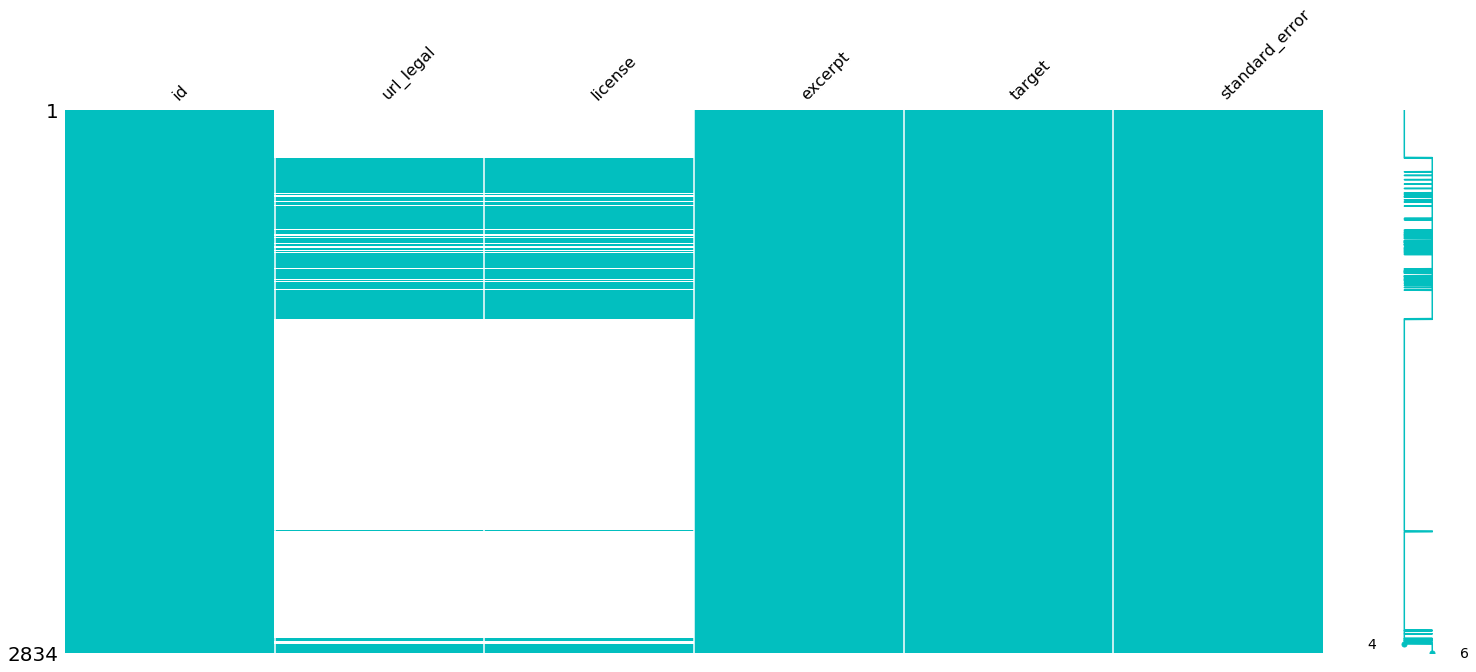

In [10]:
##Using the missingno library that is used to get the list of missing values through a figure. 
msno.matrix(df_train, color = (0.01, 0.75, 0.75))

## 2.3 Creating Useful Functions

t would be a good idea to create functions and add some of the arguments so that we don't have to repeat the code again. In addition, we can just change the arguments and it would be applied entirely to the block that of code that is present in the function. Therefore, it would be really convenient to create functions along with useful arguments that we might change when we are implemented them in the future of our code.

Below, we have defined a function called "plot_histogram" where it takes in the dataframe along with the column that we are interested and a few other arguments and plot a histogram of our configuration.

In [11]:
def plot_histogram(dataframe: pd.DataFrame, column: str, x_title = None, y_title = None, edge_color = 'black', 
                   color = 'Green', total_bins = 20, font_size = 10):
    """
    In this function, we are going to plot a histogram for the dataframe that is given
    along with some modifications and different features of histogram plot
    """
    
    fig, ax = plt.subplots(figsize = (10, 5))    ##This is used to create many plots depending on which we choose to use respectively.
    ax.hist(dataframe[column], bins = total_bins, edgecolor = edge_color, color = color)
    ax.set_title(f'Histogram Distribution of {column} values', fontsize = font_size + 5)
    ax.set_xlabel(column, fontsize = font_size)
    ax.set_ylabel("Total Number of Observations", fontsize = font_size)
    plt.show()

## 2.4 Histogram of Target Variable

Since most of the parameters are set to default values, those values are taken into consideration when plotting the histogram plots respectively. Since we want to look at the column called 'target' in our data and it's distribution, we are using that column and giving it to the function so that it plots respectively.

We see that the output is evenly distributed with the mean around -1. In addition, we find that there are very few values that are present that are greater than 1 or less than -3 as can be seen from the below plot.

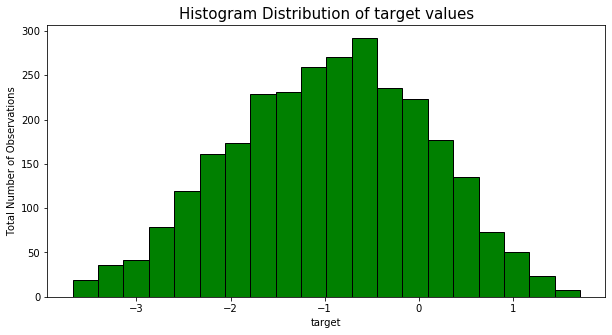

In [12]:
##Plotted the histogram of the variable that we are going to be predicting respectively. 
plot_histogram(df_train, column = 'target')

## 2.5 Histogram of Standard_Error Values


In the same light, let us now look at the standard error distribution by using the function that we have created to plot the histogram. Now we have changed the color to see the changes and how they would be applied to the block of functions.

There are a lot of values that are present around 0.5 than the other regions. We understand that there are very few values where the standard error is 0.6 or more. In addition, there are very few values where the standard error is below 0.4 respectively.

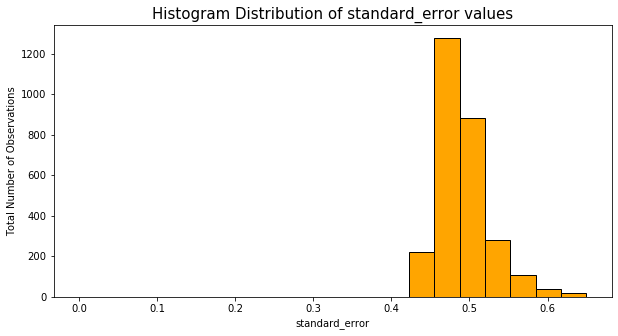

In [13]:
#Using the histogram values and we are going to plot the standard error in orange as can be seen below
plot_histogram(df_train, column = 'standard_error', color = 'orange')

In [14]:
##Reading the text that we want to see and looking at how the sentences are framed.
df_train['excerpt'].iloc[1]

'All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."\n"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?\nOh, I am so glad! Are you sure you\'re willing?"\n"I\'ve persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can\'t bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."\n"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.'

In [15]:
##Replacing a few characters that may not be useful for our machine learning predictions respectively. 
df_train['excerpt'].apply(lambda text: text.replace('\n', ' ')).iloc[1]

'All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections. At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go." "Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really? Oh, I am so glad! Are you sure you\'re willing?" "I\'ve persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can\'t bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in." "Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.'

In [16]:
df_train['excerpt'] = df_train['excerpt'].apply(lambda text: text.replace('\n', ' '))
df_test['excerpt'] = df_test['excerpt'].apply(lambda text: text.replace('\n', ' '))

In [17]:
df_train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [18]:
df_train['excerpt'].iloc[1]

'All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections. At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go." "Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really? Oh, I am so glad! Are you sure you\'re willing?" "I\'ve persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can\'t bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in." "Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.'

## 2.6 Wordcloud function

We are going to be creating a wordcloud function that is important for machine learning. We are going to be using that function to create words and understand their frequency based on the size of those words respectively. Since it would be a good idea to use wordcloud in a function so that we could use the same block of code again.

From the observation, we see that there are a few words such as "One" and "said" that are frequently occurring in our dataset. We were able to understand this with the help of the size of the words that are present in the wordcloud that indicate their frequency respectively. We also consider "." as a word and we see that it is also frequently occurrring respectively. There are some words that don't occur as much as the above mentioned words such as "country" and "never".

Therefore, we were able to get a good understanding of the wordcloud figure and see the frequency of the occurence of the words based on the size in the figure given by the wordcloud

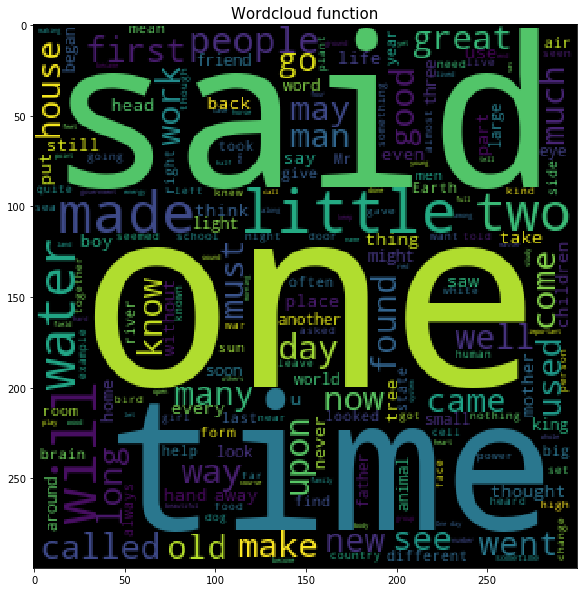

In [19]:
def wordcloud_function(df, title, column, fontsize = 15, 
                       figsize = (10, 10), width = 300, height = 300):
    """
    This function ensures that we get the size of the words based on their occurance 
    and we are going to use a figure to plot it in this function respectively. 
    """
    total_text = ''.join([text for text in df[column]])
    wordcloud = WordCloud(width = width, height = height).generate(total_text)
    plt.figure(figsize = figsize)
    plt.imshow(wordcloud)
    plt.title(title, fontsize = fontsize)
    plt.show()
wordcloud_function(df_train, title = "Wordcloud function", column = "excerpt")

Now it is time to create a preprocessing function that would take into account the text and convert it in the form where the machine learning and deep learning models could use quite easily. Therefore, we are going to take that data and ensure that we understand how the machine learning models are going to perform in the future.

In preprocessing function, we would just replace the punctuations and other things with only the text present in the excerpt. Later, we would lowercase the words and then remove the stopwords. Once the stopwords are removed, we are going to be lemmatizing those words (reducing words to their base form) so that their stem is retained along with taking the context. We would return the output as a list.

In [20]:
len(df_train)

2834

In [21]:
len(df_train) * 0.7

1983.8

In [22]:
len(df_train) * 0.75

2125.5

## 2.7 Creating preprocessing function

It is now time to understand the data and convert the essay values to different set of values that could be given to different vectorizers that are important for machine learning respectively. We would be performing various operations when we are creating this function. We would take the text and replace all the values with only alphabets. Later, we are going to lowercase the text and then tokenize and then, remove the stopwords that do not add a lot of meaning to the text. Finally, a dataframe is constructed and returned as output from the function.

In [23]:
def preprocessing_function(df):
    """
    This function takes into consideration the dataframe and extracts the text.
    In addition, it makes modifications to the text and converts it to a simpler form
    for machine learning processing respectively."""
    
    text_list = []
    for text in tqdm(df['excerpt'].values):
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = nltk.word_tokenize(text)
        [word for word in text if not word in set(stopwords.words("english"))]
        lemmatizer = nltk.WordNetLemmatizer()
        text = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(text)
        text_list.append(text)
    text_list = pd.Series(text_list)
    text_list.column = ['Converted_text']
    return text_list
        

We are going to store the output that is given by the preprocessing function into a variable and later use it.

In [24]:
preprocessed_text = preprocessing_function(df_train)

100%|██████████| 2834/2834 [00:39<00:00, 72.04it/s]


In [25]:
preprocessed_text_test = preprocessing_function(df_test)

100%|██████████| 7/7 [00:00<00:00, 77.78it/s]


## 3.1 Defining get_useful_features functions


t is now time to get the useful features that are important for machine learning. We would have to be creating new features that would help the machine learning models to get the best predictions for the difficulty of the text.

Taking into consideration the excerpt and stopwords, we are going to be creating new feautres such as total number of words, sentence length, overall change in the text length and other features that are important for getting the machine learning outputs. The function would return the final dataframe that contains all the preprocessed output along with the newly created features that are important for machine learning.



In [26]:
def get_useful_features(df, stop_words):
    """
    The function would take the dataframe and stopwords and then, convert the excerpts into different features
    such as the number of sentences, words and the lenght of the lemmas created along with the overall preprocessed
    essay length."""
    sentences = []
    num_of_words = []
    sent_length = []
    word_length = []
    lemma_length = []
    num_of_lemmas = []
    preprocessed_essay_length = []
    initial_text_length = []
    num_of_sentences = []
    text_shortage = []
    
    for text in tqdm(df['excerpt'].values):
        
        initial_length = len(text)
        initial_text_length.append(initial_length)
        num_sentences = len(sent_tokenize(text))
        num_of_sentences.append(num_sentences)
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = word_tokenize(text)
        num_words = len(text) 
        num_of_words.append(num_words)
        sent_length.append(num_words/num_sentences)
        word_length.append(initial_length/num_words)
        text = [word for word in text if not word in stop_words]
        lemmatizer = nltk.WordNetLemmatizer()
        text = [lemmatizer.lemmatize(word) for word in text]
        #print(text)
        num_lemmas = len(text)
        num_of_lemmas.append(num_lemmas)
        text = " ".join(text)
        #print(text)
        preprocessed_essay_length_value = len(text)
        preprocessed_essay_length.append(preprocessed_essay_length_value)
        #print(preprocessed_essay_length)
        #print(num_lemmas)
        lemma_length.append(preprocessed_essay_length_value/num_lemmas)
        
        text_shortage.append(preprocessed_essay_length_value/initial_length)
        
    final_df = pd.concat([pd.Series(sent_length), pd.Series(num_of_words),
                             pd.Series(word_length), pd.Series(lemma_length),
                             pd.Series(num_of_sentences), pd.Series(initial_text_length),
                             pd.Series(num_of_lemmas), pd.Series(preprocessed_essay_length),
                             pd.Series(text_shortage)], axis = 1)
    final_df.columns = ["sentence_length", "num_of_words", "word_length",
                           "lemma_length", "num_of_sentences",
                           "initial_text_length", "num_of_lemmas",
                           "preprocessed_essay_length", "text_shortage"]
    
    return final_df


We are now going to store those values into a variable that we can use to check the values respectively

In [27]:
final_df = get_useful_features(df_train, stop_words = set(stopwords.words("english")))

100%|██████████| 2834/2834 [00:02<00:00, 1287.83it/s]


In [28]:
final_df_test = get_useful_features(df_test, stop_words = set(stopwords.words("english")))


100%|██████████| 7/7 [00:00<00:00, 1233.77it/s]


We have created a dataframe and we see that there are different features that we are going to be giving to the machine learning models for predictions. We have converted the text in the form of different useful features such as the number of words, average word and sentence length, number of lemmas created and preprocessed essay length. Overall, this could be given to the machine learning models for prediction where the target which is nothing but the difficulty of the text would be predicted using machine learning.

In [29]:
final_df.head()

,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,16.454545,181,5.480663,6.494505,11,992,91,591,0.595766
1,11.466667,172,5.447674,6.482353,15,937,85,551,0.588047
2,15.636364,172,5.279070,6.273810,11,908,84,527,0.580396
3,33.400000,167,5.443114,6.095745,5,909,94,573,0.630363
4,30.200000,151,4.788079,5.581081,5,723,74,413,0.571231


## 3.2 Pairplot of Different Features

t would be a good idea to see the pairplots which are nothing but a group of scatterplots where the values are spread based on the 2 features that are considered at hand. By looking at this pairplot, one would understand if there is any correlation between features and their values and spread respectively.

When we get an almost a linear spread between features, we can understand that there is either a positive correlation or a negative correlation between the features at hand.

Based on the observation, we see that there is a good correlation between number of words and intial text length. There is also a good positive correlation between the number of words and the text shortage metric that we have created. In addition, there is also a positive correlation between the lemma word average length and the overall average length of word before lemmatization. This tells us that based on how long the word is, the lemma form of the word would almost have identical size respectively.

One more thing to observe based on the text values is that there is a slight negative correlation between the initial text length and the difficulty of the text. We can understand this to be true as when there are a lot of words in a sentence, it becomes easy to understand the text as the author usually would elaborate the points that he/she made and this ensures that there is clarity in the text and it being less difficult. More observations could be made using the pairplot function in seaborn. For now, we have made a good amount of useful observations that are important when doing the machine learning analysis.

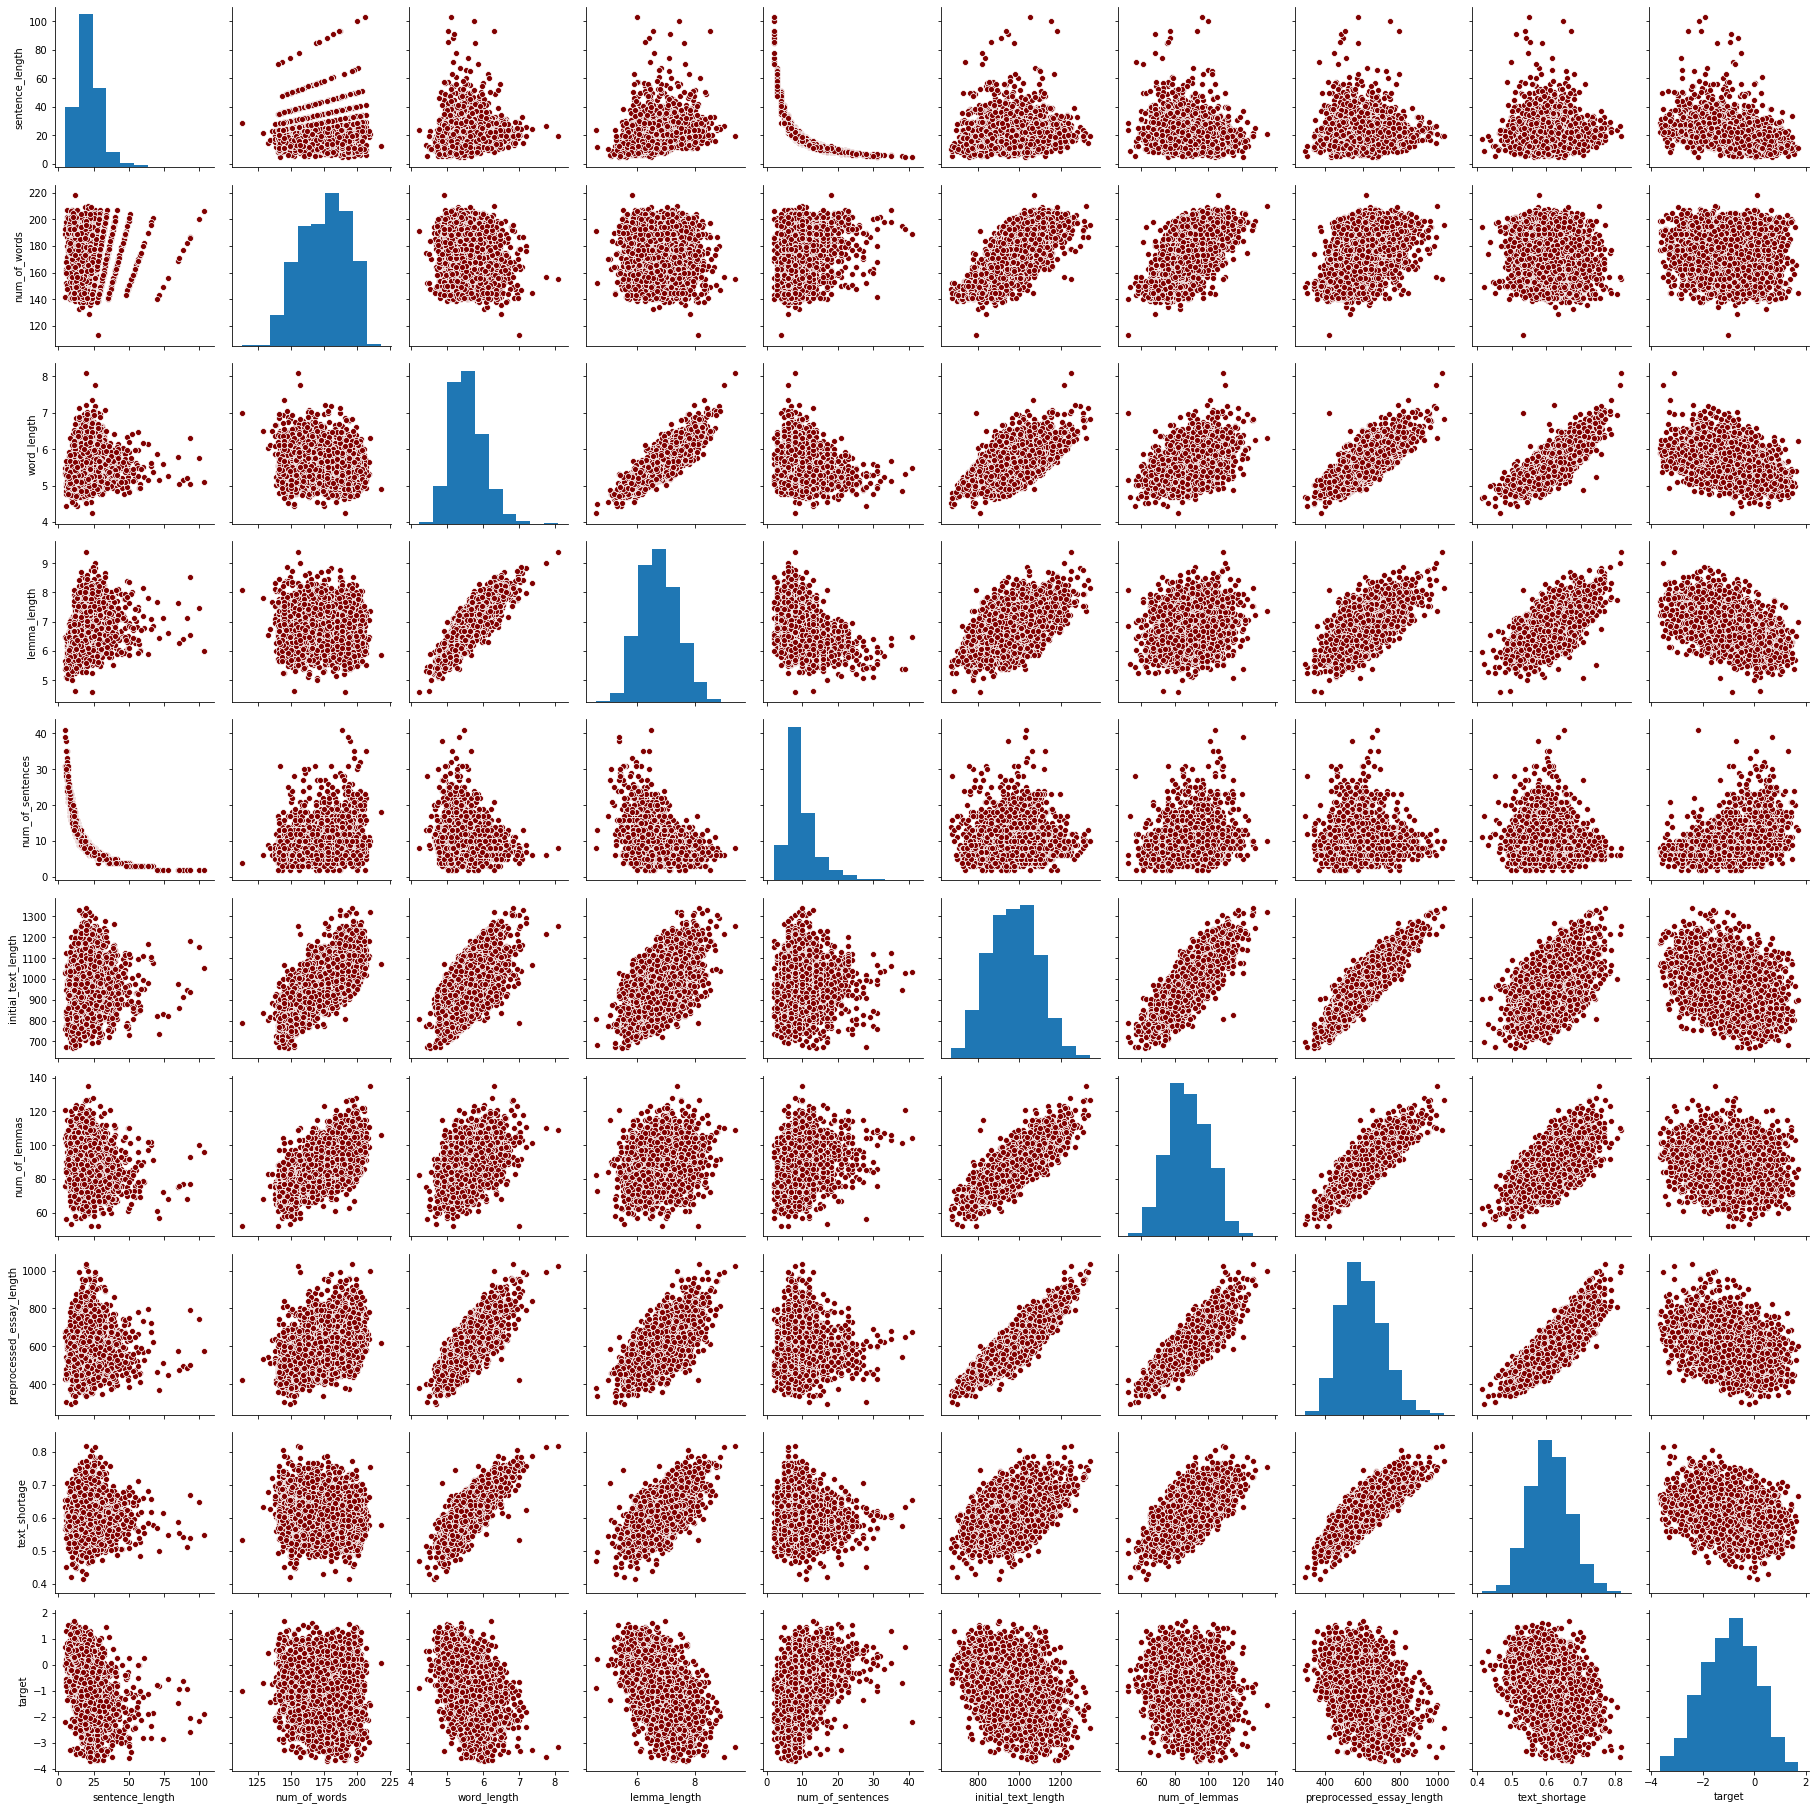

In [30]:
df_for_plotting = pd.concat([final_df, df_train["target"]], axis = 1)
ax = sns.pairplot(data = df_for_plotting, plot_kws = dict(color = "maroon"))
plt.show()

In [32]:
np.zeros_like((3, 3))

array([0, 0])

## 3.3 Heatmap of Correlation Matrix


When we are using .corr(), we are going to get the correlation values for different features in a form of a table. Since interpreting a table is quite difficult especially with float values present, it would be a good idea to visualize the data and color the points based on their values.

This is done with the aid of heatmap where based on the values present, they would change the intensity of their color. Below is a heatmap plotted that gives us a good idea about the correlation between different features that are important for machine learning.

By observing the values below, one could get an understand there is a slight negative correlation between lemma_length and the difficulty of the text. In addition, we also see a negative correlation between average word length and the text's difficulty respectively. We see that there is also a clear negative correlation between sentence length and number of sentences. This means that as the number of sentences increase, there is a higher possibility that there can be a high sentence length. However, this does not mean that correlation is equal to causation. But based on the information and the context, we might assure that there is causation between features respectively.



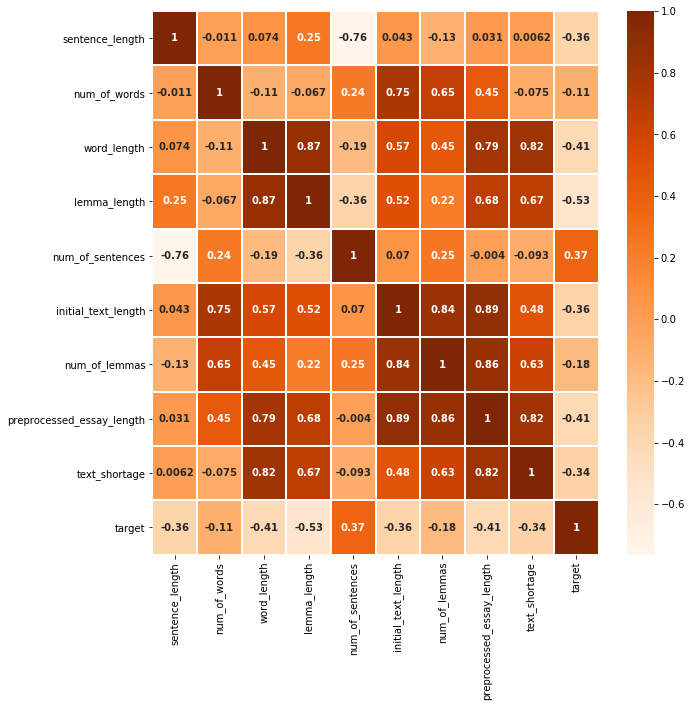

In [33]:
correlation = df_for_plotting.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, annot = True, cmap = 'Oranges', linewidths = 1,
           annot_kws = {"weight": "bold", "fontsize": 10})


## 3.4 Scatterplot function

It would be a good idea to create scatterplot function that ensures that we are able to change the parameters that are important for machine learning. We see that we might give the default parameters that are important for the scatterplot. However, we have the freedom to change the parameters as and when needed when calling the function.

Since the function would only be used for plotting rather than returning any output, there is no return in a function.

In [34]:
def scatterplot_function(df: pd.DataFrame, X, Y, figsize = (10, 10), color = 'orange'):
    plt.figure(figsize = figsize)
    sns.scatterplot(data = df, x = X, y = Y, color = color)
    plt.title(f'Scatterplot between {X} and {Y}')
    plt.show()

## 3.5 Scatterplot between num_of_sentences and target


By looking at the heatmap above, we have considered the correlation between features and seen if there is any relationship between the features.

Now, we would be focusing on the scatterplot between 'num_of_sentences' and 'target' respectively. Below, we see that there is a slight positive relationship between the output and the "num_of_sentences" feature. This could help us understand that there might be a change that when there is increase in the number of sentences, there is a possibility of the difficulty of the text would also increase. But let us not jump to the conclusion as correlation might not always be equal to causation. Hence, let us now explore more features which would ensure that we understand them and we are going to be using them.



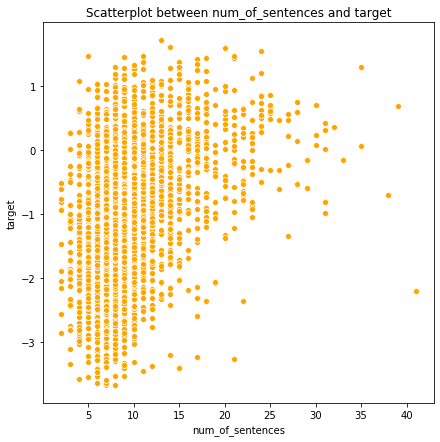

In [35]:
scatterplot_function(df_for_plotting, X = 'num_of_sentences', Y = 'target', figsize = (7, 7))


## 3.6 Scatterplot between 'preprocessed_essay_length' and 'num_of_lemmas'


Now, we are going to plot between 'preprocessed_essay_length' and 'num_of_lemmas' as we have seen that their correlation value is about 0.86 respectively. Therefore, we have plotted the scatterplot to understand the values respectively. We see that there is a good correlation between the features as there is not much scatter between the 2 features that we have considered.

Lemmas are the words that are created after preprocessing the actual words and replacing those words with their stems but also considering the context at which those words appear. This ensures that we get the right stems that later could be vectorized and given to the machine learning models for processing and prediction respectively.

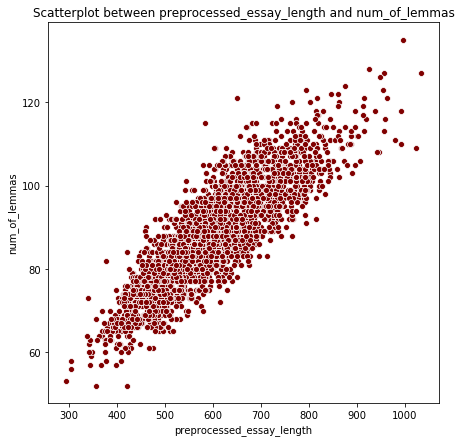

In [36]:
scatterplot_function(df_for_plotting, X = 'preprocessed_essay_length', Y = 'num_of_lemmas', figsize = (7, 7), color = 'maroon')


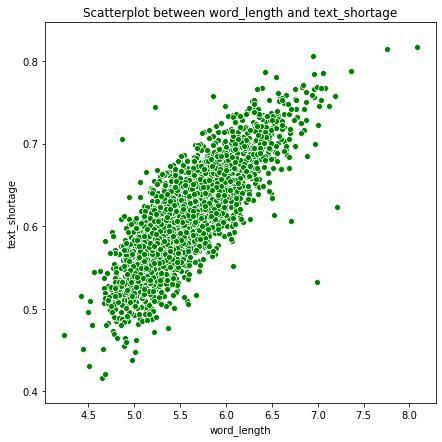

In [37]:
scatterplot_function(df_for_plotting, X = 'word_length', Y = 'text_shortage', figsize = (7, 7), color = 'green')


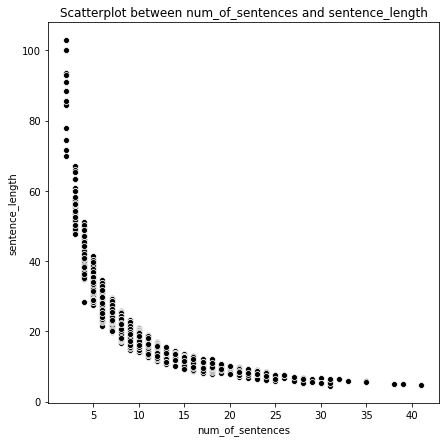

In [38]:
scatterplot_function(df_for_plotting, X = 'num_of_sentences', Y = 'sentence_length', figsize = (7, 7), color = 'black')


In [39]:
type(df_train['excerpt'])


pandas.core.series.Series

In [40]:
df_for_plotting.head()


,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage,target
0,16.454545,181,5.480663,6.494505,11,992,91,591,0.595766,-0.340259
1,11.466667,172,5.447674,6.482353,15,937,85,551,0.588047,-0.315372
2,15.636364,172,5.279070,6.273810,11,908,84,527,0.580396,-0.580118
3,33.400000,167,5.443114,6.095745,5,909,94,573,0.630363,-1.054013
4,30.200000,151,4.788079,5.581081,5,723,74,413,0.571231,0.247197


## 3.7 Creating new function that generates more features


We are going to create a function that would create more features such as counting the number of commas, semicolons and other important features that are important for machine learning analysis. We would have to create empty lists of these values and we are going to concat those by converting them into series and then, return a new dataframe respectively.

With the help of this function, we have created new dataframe which contains the useful columns that are important for machine learning respectively. We would be performing the feature analysis and thise ensures that we are going to be getting the best results on the test set respectively.

At last, we are going to concat those values that are important for machine learning and this would ensure that we get the best results in the test set respectively. We are going to be taking those values and this ensures that we are getting the best results on the test set.



In [41]:
def generate_more_features(df: pd.DataFrame):
    """
    This function would create a dataframe of different useful features
    that are important for machine learning predictions respectively.
    """
    commas = []
    semicolon = []
    exclamations = []
    questions = []
    quotes = []
    periods = []
    longest_word = []
    
    for i in range(len(df)):
        
        #word_len = []
        text = df['excerpt'].iloc[i]
        commas.append(text.count(","))
        semicolon.append(text.count(";"))
        exclamations.append(text.count("!"))
        questions.append(text.count("?"))
        quotes.append(text.count('"'))
        periods.append(text.count('.'))
        word_len = [len(w) for w in text.split(" ")]
        longest_word.append(np.max(word_len))
        
    df_with_features =pd.concat((pd.Series(commas), pd.Series(semicolon), pd.Series(exclamations),
                               pd.Series(questions), pd.Series(quotes), pd.Series(periods),
                                pd.Series(longest_word)), axis = 1)
    df_with_features.columns = ["num_of_commas", "num_of_semicolons", "num_of_explamations",
                                "num_of_questions", "num_of_quotes", "num_of_periods", 
                                "longest_word"]
                                
    return df_with_features

We would be using those functions and we are going to be taking those values in a variable respectively.



In [42]:
df_with_more_features = generate_more_features(df_train)


In [43]:
df_with_more_features_test = generate_more_features(df_test)


Reading the head of the dataframe, we see that there are different columns created along with the numerical representation respectively. Therefore, we have created a new dataframe in the above function and we have created some important features that could be used for machine learning analysis.



In [44]:
df_with_more_features.head()


,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word
0,14,0,0,0,0,11,11
1,24,0,5,2,12,10,12
2,17,2,1,0,10,11,14
3,23,2,0,0,0,5,13
4,13,10,0,0,0,5,12


We are now going to check whether there are any null values that are present in the newly created dataframe. We see below that there are some values that are null present in our dataframe. Therefore, we have to take our time to remove those null values so that we are going to be using the things that we are sure that the more we are learning in the long term.



In [45]:
any(df_with_more_features.isnull())


True

We are going to be creating the dataframe where there are null or not values that we are going to be using.



In [46]:
df_with_more_features.isnull()


,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2829,False,False,False,False,False,False,False
2830,False,False,False,False,False,False,False
2831,False,False,False,False,False,False,False
2832,False,False,False,False,False,False,False


We are going to be taking a look at the null values and we are going to understand the different machine learning information respectively.



In [47]:
df_with_more_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   num_of_commas        2834 non-null   int64
 1   num_of_semicolons    2834 non-null   int64
 2   num_of_explamations  2834 non-null   int64
 3   num_of_questions     2834 non-null   int64
 4   num_of_quotes        2834 non-null   int64
 5   num_of_periods       2834 non-null   int64
 6   longest_word         2834 non-null   int64
dtypes: int64(7)
memory usage: 155.1 KB


We are going to read the head of the dataframe and see the values and how they are spread out.



In [48]:
df_with_more_features.head()


,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word
0,14,0,0,0,0,11,11
1,24,0,5,2,12,10,12
2,17,2,1,0,10,11,14
3,23,2,0,0,0,5,13
4,13,10,0,0,0,5,12


In [49]:
df_train['excerpt'].iloc[140]


'Little Sara Crewe never went in or out of the house without reading that door plate and reflecting upon it. By the time she was twelve, she had decided that all her trouble arose because, in the first place, she was not "Select," and in the second she was not a "Young Lady." When she was eight years old, she had been brought to Miss Minchin as a pupil, and left with her. Her papa had brought her all the way from India. Her mamma had died when she was a baby, and her papa had kept her with him as long as he could. And then, finding the hot climate was making her very delicate, he had brought her to England and left her with Miss Minchin, to be part of the Select Seminary for Young Ladies. Sara, who had always been a sharp little child, who remembered things, recollected hearing him say that he had not a relative in the world whom he knew of, and so he was obliged to place her at a boarding-school, and he had heard Miss Minchin\'s establishment spoken of very highly.'

In [50]:
df_train['excerpt'].iloc[143]


'"You really wish me to understand, Brady, that not you alone, but all the elder boys—day-pupils and boarders alike—desire of your own free-will to devote your next Saturday\'s half-holiday to conveying this poor man\'s plants from his house at Brickland to the Rookwood sale?" "Yes, sir, that\'s what we want to do." "H\'m! Well, the proposal does you credit, and you certainly might employ your time much worse than in carrying it out. I don\'t think it would be right for me to refuse your request. Mr. Anderson, I feel sure, will be ready to help and advise you, if necessary, but as the idea is your own I should like you, as far as possible, to carry it out by yourselves." "Thank you, sir!" said Jack, and withdrew. It was evening when this dialogue took place. The day-boys had departed in an irritable frame of mind, on account of various annoyances of which they had been the victims during the past two days. Bacon had been tripped up twice by a piece of string, Hughes had found his coat-

In [51]:
df_for_plotting = pd.concat([df_with_more_features, df_train['target']], axis = 1)


## 3.8 Pairplot of Other Features


Understanding some of the pairplots, we are going to use them to see how the values are spread. We could see one positive correlation between the difficulty of the text and the "num_of_periods" that we have in our data. This means that more the number of sentences, there is a higher change for the text to be difficult to a certain extent.

In addition to this, we also see that there is a relationship between the number of quotes and the difficulty of the text. We see quite a linear relationship between the features as can be seen.

There is also a positive relationship between the number of questions and the difficulty of the text respectively. Therefore, by looking at the pairplot, we see that there are some features that are quite useful when doing the machine learning analysis respectively.

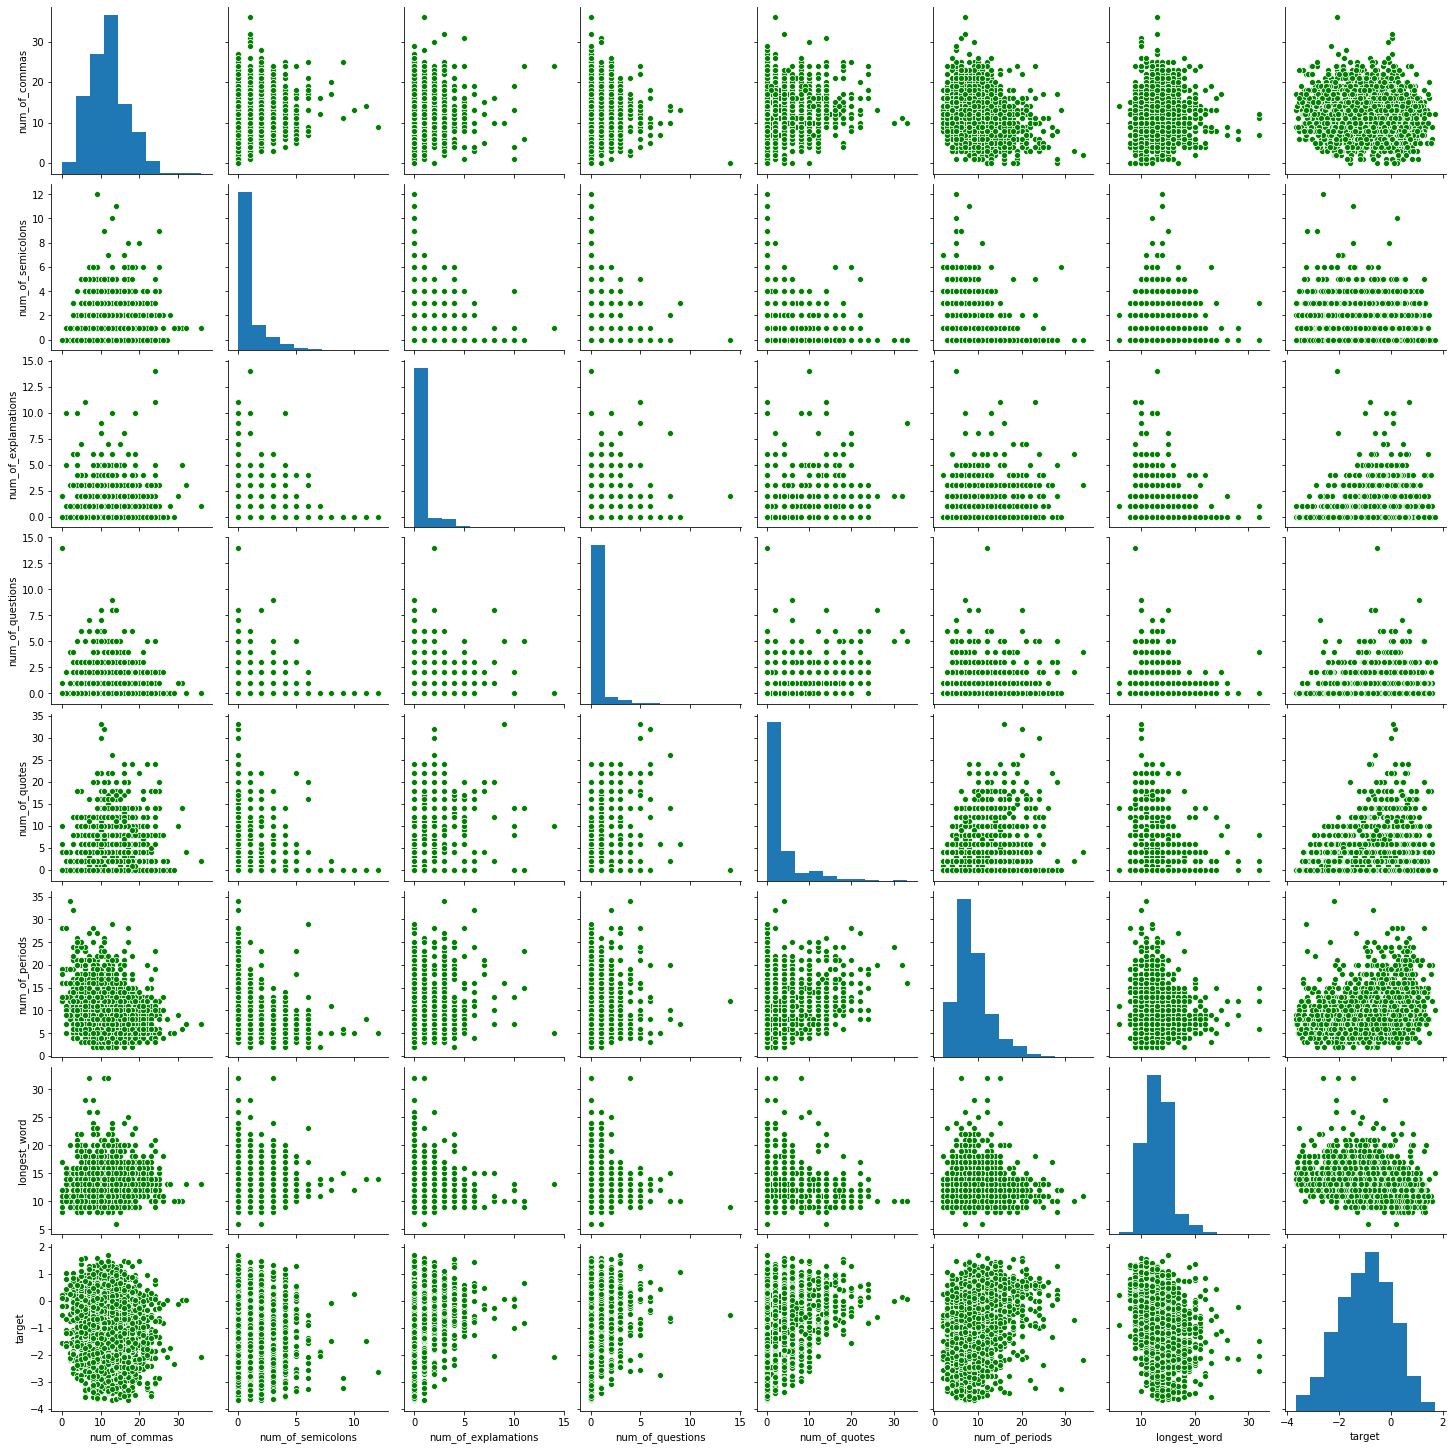

In [52]:
sns.pairplot(df_for_plotting, plot_kws = dict(color = 'green'))
plt.show()


## 3.9 Heatmap between num_of_quotes and num_of_questions


Since we have created new features, let us see how these features are related to each other and the output variable respectively. We make some interesting observations by looking at the heatmap below.

1. The feature num_of_explanations is quite related to num_of_quotes as can be seen in the heatmap below.
2. We see that the num_of_questions are quite related to the num_of_quotes as well.
3. There is a negative correlation between the num_of_semicolons and the num_of_periods.
4. num_of_quotes and num_of_periods are quite positively correlated with the difficulty of the text.
5. There is also a negative correlation between the length of the longest word and the difficulty of the text.

 With the help of heatmap, therefore, we were able to make some interesting observations above.



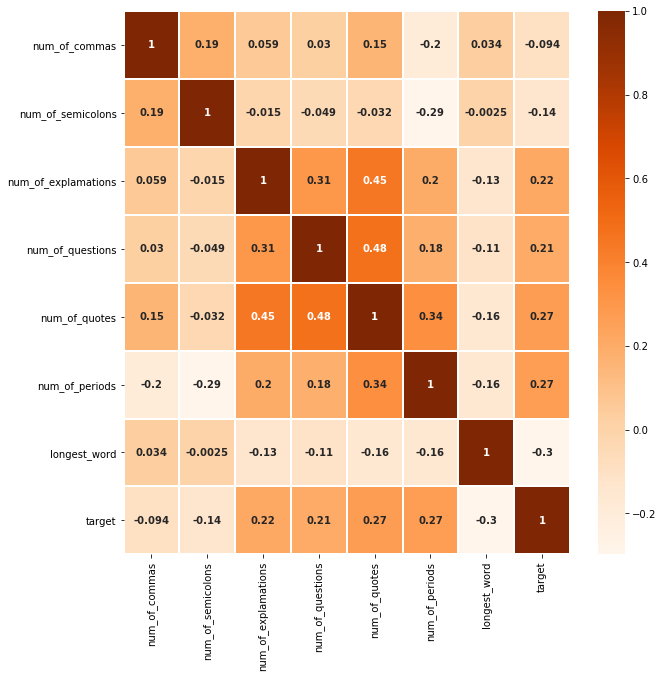

In [53]:
df_correlation = df_for_plotting.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(df_correlation, annot = True, cmap = 'Oranges', linewidths = 1,
           annot_kws = {"weight": "bold", "fontsize": 10})

In [54]:
df_with_more_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   num_of_commas        2834 non-null   int64
 1   num_of_semicolons    2834 non-null   int64
 2   num_of_explamations  2834 non-null   int64
 3   num_of_questions     2834 non-null   int64
 4   num_of_quotes        2834 non-null   int64
 5   num_of_periods       2834 non-null   int64
 6   longest_word         2834 non-null   int64
dtypes: int64(7)
memory usage: 155.1 KB


In [55]:
generate_more_features(df_train)


,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word
0,14,0,0,0,0,11,11
1,24,0,5,2,12,10,12
2,17,2,1,0,10,11,14
3,23,2,0,0,0,5,13
4,13,10,0,0,0,5,12
...,...,...,...,...,...,...,...
2829,12,0,0,3,0,10,15
2830,5,0,0,1,0,13,15
2831,2,1,0,1,0,16,14
2832,8,1,0,0,0,12,28


In [57]:
df_train['excerpt_length'] = df_train.excerpt.apply(len)
df_test['excerpt_length'] = df_test.excerpt.apply(len)

In [58]:
df_train.head()


,id,url_legal,license,excerpt,target,standard_error,excerpt_length
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,992
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,937
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,908
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,909
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,723


In [59]:
df_test.head()


,id,url_legal,license,excerpt,excerpt_length
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...,772
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...,967
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...,948
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...,1144
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...,1094


In [60]:
def Count_Vectorizer(df: pd.DataFrame):
    vectorizer = CountVectorizer()
    vectorizer.fit(df['excerpt'])
    converted_vector = vectorizer.transform(df['excerpt'])
    return converted_vector

In [61]:
Count_Vectorizer(df_train)


<2834x26833 sparse matrix of type '<class 'numpy.int64'>'
	with 294295 stored elements in Compressed Sparse Row format>

In [62]:
from nltk.corpus import stopwords

## 4.1 Creating Decontracted function


We are going to be creating this function which would take the actual subtext values and convert to forms that are easily accessible to the reader. Some of the words can be seen below from the function where the short forms are replaced with more useful texts respectively. This function is created so that the output from this could be given to other function that we are going to create just below this function

In [63]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    """
    This function would convert some short letters into the forms that one 
    could easily understand respectively.
    """
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

## 4.2 Creating preprocessing_function


It is now time to create the preprocessing function that takes into account the dataframe and it would be removing the stopwords from the text. Later, it would be replacing those complex words that we have seen above with the easy words that are easier to preprocess and understand. Later, lemmatization is done which would replace the words into simpler forms so that they could be given to different machine learning and deep learning models to generate the output respectively

In [64]:
def preprocessing_function(df):
    """
    In this function, we are going to be performing the basic preprocessing 
    which is needed before giving to different vectorizers. This ensures that
    we are getting the best output values respectively.
    """
    
    stopwords_new = set(stopwords.words('english'))
    text_list = []
    for i in tqdm(range(len(df['excerpt']))):
        text = df['excerpt'].iloc[i]
        text = decontracted(text)
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = [word for word in text.split(' ') if not word in stopwords_new]
        lemmatizer = nltk.WordNetLemmatizer()
        text = [lemmatizer.lemmatize(word) for word in text]
        text_list.append(' '.join(text))
    return text_list

We are going to take the values that are given by the function and store it in a variable as can be seen below.



In [65]:
df_train_preprocessed = preprocessing_function(df_train)


100%|██████████| 2834/2834 [00:00<00:00, 3126.60it/s]


Similar process is applied to the test set so that we might make predictions with the best machine learning or deep learning model that we would be getting as the output.



In [66]:
df_test_preprocessed = preprocessing_function(df_test)


100%|██████████| 7/7 [00:00<00:00, 1505.49it/s]


Taking a look at the head of the preprocessed that we got from the function and stored in this variable.



In [67]:
preprocessed_text.head()


0    when the young people returned to the ballroom...
1    all through dinner time mr fayre wa somewhat s...
2    a roger had predicted the snow departed a quic...
3    and outside before the palace a great garden w...
4    once upon a time there were three bear who liv...
dtype: object

In [68]:
df_with_more_features.head()


,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word
0,14,0,0,0,0,11,11
1,24,0,5,2,12,10,12
2,17,2,1,0,10,11,14
3,23,2,0,0,0,5,13
4,13,10,0,0,0,5,12


In [69]:
df_for_plotting.head()


,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word,target
0,14,0,0,0,0,11,11,-0.340259
1,24,0,5,2,12,10,12,-0.315372
2,17,2,1,0,10,11,14,-0.580118
3,23,2,0,0,0,5,13,-1.054013
4,13,10,0,0,0,5,12,0.247197


In [70]:
final_df.head()


,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,16.454545,181,5.480663,6.494505,11,992,91,591,0.595766
1,11.466667,172,5.447674,6.482353,15,937,85,551,0.588047
2,15.636364,172,5.279070,6.273810,11,908,84,527,0.580396
3,33.400000,167,5.443114,6.095745,5,909,94,573,0.630363
4,30.200000,151,4.788079,5.581081,5,723,74,413,0.571231


## 4.3 Concatenating the dataframes


We are going to be concatenating the dataframes that we have created previously. Taking some important features and the overall output values, we are later going to be generating the predictions that are important for machine learning outputs respectively.

In [71]:
df_complete = pd.concat((preprocessed_text, df_with_more_features, final_df), axis = 1)


We are also going to be doing the same thing for the test set. Considering the test set, we have to later apply the overall process that we have created for the training data. When we are done with the output values, we are going to be taking those new values which would ensure that we get the best output values respectively.

In [72]:
df_complete_test = pd.concat((preprocessed_text_test, df_with_more_features_test, final_df_test), axis = 1)


We would be looking at the dataframe we got above and looking at some of the columns that we have taken into consideration.

In [73]:
df_complete.head()


,0,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,when the young people returned to the ballroom...,14,0,0,0,0,11,11,16.454545,181,5.480663,6.494505,11,992,91,591,0.595766
1,all through dinner time mr fayre wa somewhat s...,24,0,5,2,12,10,12,11.466667,172,5.447674,6.482353,15,937,85,551,0.588047
2,a roger had predicted the snow departed a quic...,17,2,1,0,10,11,14,15.636364,172,5.279070,6.273810,11,908,84,527,0.580396
3,and outside before the palace a great garden w...,23,2,0,0,0,5,13,33.400000,167,5.443114,6.095745,5,909,94,573,0.630363
4,once upon a time there were three bear who liv...,13,10,0,0,0,5,12,30.200000,151,4.788079,5.581081,5,723,74,413,0.571231


We are going to also see how the test set values are generated.

In [74]:
df_complete_test.head()

,0,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,my hope lay in jack s promise that he would ke...,6,0,0,0,4,8,10,18.750000,150,5.146667,6.732394,8,772,71,478,0.619171
1,dotty continued to go to mr gray s every night...,10,2,0,0,8,12,12,20.555556,185,5.227027,5.947917,9,967,96,571,0.590486
2,it wa a bright and cheerful scene that greeted...,16,1,0,0,10,13,10,14.833333,178,5.325843,6.470588,12,948,85,550,0.580169
3,cell division is the process by which a parent...,10,0,0,0,0,7,12,25.714286,180,6.355556,7.633929,7,1144,112,855,0.747378
4,debugging is the process of finding and resolv...,15,0,0,0,10,6,13,27.833333,167,6.550898,7.833333,6,1094,102,799,0.730347


In [75]:
preprocessed_text.head()


0    when the young people returned to the ballroom...
1    all through dinner time mr fayre wa somewhat s...
2    a roger had predicted the snow departed a quic...
3    and outside before the palace a great garden w...
4    once upon a time there were three bear who liv...
dtype: object

In [76]:
vectorizer = TfidfVectorizer()
array_output_values = vectorizer.fit_transform(preprocessed_text)

In [77]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential


In [78]:
vectorizer = TfidfVectorizer()
vectorizer.fit(df_train['excerpt'])
df_train_converted = vectorizer.transform(df_train['excerpt'])


In [79]:
df_train_converted

<2834x26833 sparse matrix of type '<class 'numpy.float64'>'
	with 294295 stored elements in Compressed Sparse Row format>

In [80]:
df_train_converted

<2834x26833 sparse matrix of type '<class 'numpy.float64'>'
	with 294295 stored elements in Compressed Sparse Row format>

In [81]:
df_complete.head()


,0,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,when the young people returned to the ballroom...,14,0,0,0,0,11,11,16.454545,181,5.480663,6.494505,11,992,91,591,0.595766
1,all through dinner time mr fayre wa somewhat s...,24,0,5,2,12,10,12,11.466667,172,5.447674,6.482353,15,937,85,551,0.588047
2,a roger had predicted the snow departed a quic...,17,2,1,0,10,11,14,15.636364,172,5.279070,6.273810,11,908,84,527,0.580396
3,and outside before the palace a great garden w...,23,2,0,0,0,5,13,33.400000,167,5.443114,6.095745,5,909,94,573,0.630363
4,once upon a time there were three bear who liv...,13,10,0,0,0,5,12,30.200000,151,4.788079,5.581081,5,723,74,413,0.571231


In [82]:
df_complete_test.head()


,0,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,my hope lay in jack s promise that he would ke...,6,0,0,0,4,8,10,18.750000,150,5.146667,6.732394,8,772,71,478,0.619171
1,dotty continued to go to mr gray s every night...,10,2,0,0,8,12,12,20.555556,185,5.227027,5.947917,9,967,96,571,0.590486
2,it wa a bright and cheerful scene that greeted...,16,1,0,0,10,13,10,14.833333,178,5.325843,6.470588,12,948,85,550,0.580169
3,cell division is the process by which a parent...,10,0,0,0,0,7,12,25.714286,180,6.355556,7.633929,7,1144,112,855,0.747378
4,debugging is the process of finding and resolv...,15,0,0,0,10,6,13,27.833333,167,6.550898,7.833333,6,1094,102,799,0.730347


In [83]:
df_complete_important_features = df_complete.iloc[:, 1:]
df_complete_important_features_test = df_complete_test.iloc[:, 1:]

In [84]:
df_complete_important_features.head()


,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,14,0,0,0,0,11,11,16.454545,181,5.480663,6.494505,11,992,91,591,0.595766
1,24,0,5,2,12,10,12,11.466667,172,5.447674,6.482353,15,937,85,551,0.588047
2,17,2,1,0,10,11,14,15.636364,172,5.279070,6.273810,11,908,84,527,0.580396
3,23,2,0,0,0,5,13,33.400000,167,5.443114,6.095745,5,909,94,573,0.630363
4,13,10,0,0,0,5,12,30.200000,151,4.788079,5.581081,5,723,74,413,0.571231


In [85]:
from sklearn.preprocessing import MinMaxScaler


## 4.4 Creating min_max_scaler function


With the help of this function, the training and the test values are converted to scaled outputs where the minimum value is 0 and the maximum value is 1 respectively. In other words, this function would just be converting those high values to lie between 0 and 1.

In [86]:
def min_max_scaler(df_train, df_test):
    """
    This function performs the scaling operation by taking into account the train and test set respectively. It is going to 
    convert the values that are present in the data to lie between 0 and 1 respectively.
    """
    scaler = MinMaxScaler()
    scaler.fit(df_train)
    df_scaled = scaler.transform(df_train)
    df_scaled_test = scaler.transform(df_test)
    return df_scaled, df_scaled_test

## 4.5 Creating Tfidf_Vectorier function


This function would convert the training and the test values to Tfidf vectors that are important for machine learning analysis in the future respectively. Therefore, the text document is converted into a group of vectors that is easy for the machine learning and deep learning models to perform well on the training and the test data.

We have to note that the machine learning models would be working with only the numerical data rather than any other sort of data such as text and other forms of data. Hence, steps must be taken to ensure that the values that are given to the machine learning models are numerical in nature.

In [87]:
def Tfidf_Vectorizer(df_train, df_test):
    """
    This function would take the training data and the test data and convert those values which would be in the form of text 
    to tfidf values that could be later used for machine learning analysis.
    """
    vectorizer = TfidfVectorizer()
    df_vectorized_train = vectorizer.fit_transform(df_train)
    df_vectorized_test = vectorizer.transform(df_test)
    return df_vectorized_train, df_vectorized_test

## 4.6 Creating Count_Vectorizer function


In the count vectorizer function, the original text document both for the training and the test sets are taken and we are going to be converting those values Bag-Of-Words (BOW) representation that would be later given to the machine learning models for prediction

In [88]:
def Count_Vectorizer(df_train, df_test):
    """
    This function would take the training data and the test data and convert those values which would be in the form of text to 
    bag of words representation or count vectorized values which are later used for machine learning prediction.
    """
    vectorizer = CountVectorizer()
    df_vectorized_train = vectorizer.fit_transform(df_train)
    df_vectorized_test = vectorizer.transform(df_test)
    return df_vectorized_train, df_vectorized_test

In [89]:
df_complete_important_features
df_complete_important_features_test

,num_of_commas,num_of_semicolons,num_of_explamations,num_of_questions,num_of_quotes,num_of_periods,longest_word,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,6,0,0,0,4,8,10,18.750000,150,5.146667,6.732394,8,772,71,478,0.619171
1,10,2,0,0,8,12,12,20.555556,185,5.227027,5.947917,9,967,96,571,0.590486
2,16,1,0,0,10,13,10,14.833333,178,5.325843,6.470588,12,948,85,550,0.580169
3,10,0,0,0,0,7,12,25.714286,180,6.355556,7.633929,7,1144,112,855,0.747378
4,15,0,0,0,10,6,13,27.833333,167,6.550898,7.833333,6,1094,102,799,0.730347
5,8,0,0,2,0,7,13,17.000000,153,5.379085,6.589744,9,823,78,514,0.624544
6,6,0,0,0,0,15,12,10.733333,161,5.552795,6.707317,15,894,82,550,0.615213


In [90]:
df_train_converted


<2834x26833 sparse matrix of type '<class 'numpy.float64'>'
	with 294295 stored elements in Compressed Sparse Row format>

In [91]:
df_scaled, df_scaled_test = min_max_scaler(df_complete_important_features, df_complete_important_features_test)


## 4.7 Creating Vectorizer_decision function


This function would give the user whether he/she should be using the Count Vectorizer or the Tfidf Vectorizer that is being used for machine learning. Therefore, they have the freedom to select the type of vectorizer which might be given to the dataframe which would later be used for predictions. The Vectorizer decision would use the above functions which we have created and this would be the main function that would take into account all the values that are present respectively

In [92]:
def Vectorizer_decision(df_train, df_test):
    print("Please enter the vectorizer that you would like to use for your data")
    print("Please select from the following options")
    print("1. Count Vectorizer")
    print("2. Tfidf Vectorizer")
    choice = int(input("Enter 1 or 2:"))
    type(choice)
    if choice != 1 and choice != 2:
        choice = input("Please select only from the listed options")
        vectorized_train = 0
        vectorized_test = 0
    elif choice == 1:
        print("Count Vectorizer Selected")
        vectorized_train, vectorized_test = Count_Vectorizer(df_train.iloc[:, 0], df_test.iloc[:, 0])
    else:
        print("Tfidf Vectorizer Selected")
        vectorized_train, vectorized_test = Tfidf_Vectorizer(df_train.iloc[:, 0], df_test.iloc[:, 0])
    return vectorized_train, vectorized_test

Storing the vectorizer outputs in different variables respectively.



In [94]:
df_vectorized, df_vectorized_test = Vectorizer_decision(df_complete.copy(), df_complete_test.copy())


Please enter the vectorizer that you would like to use for your data
Please select from the following options
1. Count Vectorizer
2. Tfidf Vectorizer
Enter 1 or 2:1
Count Vectorizer Selected


Since the output that we got is a sparse matrix after giving to the vectorizers, it is important to convert those values to numpy vectors before performing the machine learning tasks.

In [95]:
df_vectorized = df_vectorized.toarray()
df_vectorized_test = df_vectorized_test.toarray()

Let us now look at the scaled version that we would be giving to the machine learning models for predictions.



In [96]:
df_scaled

array([[0.38888889, 0.        , 0.        , ..., 0.46987952, 0.40135135,
        0.44838158],
       [0.66666667, 0.        , 0.35714286, ..., 0.39759036, 0.3472973 ,
        0.42915555],
       [0.47222222, 0.16666667, 0.07142857, ..., 0.38554217, 0.31486486,
        0.4101006 ],
       ...,
       [0.05555556, 0.08333333, 0.        , ..., 0.3253012 , 0.27297297,
        0.26628578],
       [0.22222222, 0.08333333, 0.        , ..., 0.3373494 , 0.29324324,
        0.43759456],
       [0.63888889, 0.08333333, 0.        , ..., 0.30120482, 0.32297297,
        0.46455549]])

Now, it is now time concatenate the created numpy arrays so that they could be ready to be split.



In [97]:
X = np.concatenate((df_vectorized, df_scaled), axis = 1)
X_test = np.concatenate((df_vectorized_test, df_scaled_test), axis = 1)
y = df_train['target'].values

Just to ensure that everything we did is correct, we'll check the length of the input numpy array.



In [98]:
len(X)


2834

Similarly, we do the same for the test set as well.



In [99]:
len(X_test)


7

## 4.8 Splitting the data into training and cross-validation data


The overall input is going to be divided into training and cross-validation data. We have the test data with us without any labels. We are going to be taking only the trianing and cross-validation data and we are going to be using those values to be predicting the test set respectively. About 70 percent of the values are going to be taken as the training data and the remaining 30 percent of the values are going to be the cross-validation data points respectively. We randomly assign a state so that that split is created everytime we use the train_test_split method respectively.

In [100]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)


## 5.1 Neural Network Model


A new function that would give the basic architecture of a neural network is created. The neural network model takes into account the training and the validation data. In addition, it just takes the default values of the metrics to be mean_squared_error and mean_absolute_error respectively. The activation units used are 'relu' by default. In addition to this, the default optimizer is 'adam'm and the loss that we are going to be considering is the 'mean_squared_error' loss respectively. The default epoch values are 10 and batch_size is about 64. We might change the values accordingly as and when required.

In [101]:
def neural_network(X_train, y_train, Validation_data = None, metrics = ['mean_squared_error', 'mean_absolute_error'], 
                   activation = 'relu', input_shape = (22690, ), optimizer = 'adam', loss = 'mean_squared_error',
                  epochs = 10, batch_size = 64, verbose = 1):
    """
    We are defining a neural network function that takes into account a different set of parameters
    that are needed to build the machine learning model and we are also giving different values
    and it would be working with different parameters and we are able to give those values to our 
    deep learning models and we are going to return the output given by the model respectively.
    """
    
    model = Sequential()
    model.add(Dense(500, activation = activation, input_shape = input_shape))
    model.add(Dense(100, activation = activation))
    model.add(Dense(50, activation = activation))
    model.add(Dense(10, activation = activation))
    model.add(Dense(5, activation = activation))
    model.add(Dense(1))
    model.compile(loss = loss, metrics = metrics, optimizer = optimizer)
    if Validation_data:
              model.fit(x = X_train, y = y_train, validation_data = Validation_data, epochs = epochs, batch_size = batch_size, verbose = verbose)
    else:
              model.fit(x = X_train, y = y_train, epochs = epochs, batch_size = batch_size, verbose = verbose)
    return model 

A new variable called 'model' is created that would take the output of the neural network function. We might change a few parameters to the function but it is not required for now. But we have the freedom to change some default values that would change some training parameters in the deep learning model.



In [102]:
model = neural_network(X_train = X_train, y_train = y_train, Validation_data = (X_cv, y_cv))


Epoch 1/10
31/31 [==============================] - 2s 46ms/step - loss: 1.0498 - mean_squared_error: 1.0498 - mean_absolute_error: 0.8140 - val_loss: 0.5027 - val_mean_squared_error: 0.5027 - val_mean_absolute_error: 0.5630
Epoch 2/10
31/31 [==============================] - 1s 43ms/step - loss: 0.2828 - mean_squared_error: 0.2828 - mean_absolute_error: 0.4142 - val_loss: 0.5151 - val_mean_squared_error: 0.5151 - val_mean_absolute_error: 0.5750
Epoch 3/10
31/31 [==============================] - 1s 47ms/step - loss: 0.0919 - mean_squared_error: 0.0919 - mean_absolute_error: 0.2276 - val_loss: 0.5395 - val_mean_squared_error: 0.5395 - val_mean_absolute_error: 0.5853
Epoch 4/10
31/31 [==============================] - 1s 42ms/step - loss: 0.0314 - mean_squared_error: 0.0314 - mean_absolute_error: 0.1337 - val_loss: 0.5217 - val_mean_squared_error: 0.5217 - val_mean_absolute_error: 0.5785
Epoch 5/10
31/31 [==============================] - 1s 42ms/step - loss: 0.0166 - mean_squared_error

In [103]:
model.predict(X_test)


array([[-0.9404439 ],
       [-0.70759654],
       [-0.5923163 ],
       [-2.3823256 ],
       [-1.1009418 ],
       [ 0.02110654],
       [ 0.3887309 ]], dtype=float32)

## 5.2 TFIDF Vectorizer


We are going to be using the Tfidf vectorizer that would give us a good understanding of the performance of the neural network model. In the Tfidf Vectorizer, we are going to be taking the different words that are present in a text and also calculated the inverse document frequency of a particular word. We are going to be doing this process for all the words and see the importance of different words and those values are given for each and every word that we have considered. This would ensure that a mathematical vector is created for the machine learning processing respectively

In [104]:
df_vectorized, df_vectorized_test = Vectorizer_decision(df_complete, df_complete_test)


Please enter the vectorizer that you would like to use for your data
Please select from the following options
1. Count Vectorizer
2. Tfidf Vectorizer
Enter 1 or 2:2
Tfidf Vectorizer Selected


The output that we get from the above is a sparse matrix. Since we cannot work with sparse matrices for machine learning applications, it would be a good idea to convert those values to numpy vectors which would ensure that we get the best output values respectively.

In [105]:
df_vectorized = df_vectorized.toarray()
df_vectorized_test = df_vectorized_test.toarray()

We are going to be taking a look at the vectorizer and the output values just to ensure how the values are spread respectively.



In [106]:
len(df_vectorized)


2834

Using the numpy concatenate attribute, we would take the values into account and join the previous scaled values to the vectorized values respectively.



In [107]:
X = np.concatenate((df_vectorized, df_scaled), axis = 1)
X_test = np.concatenate((df_vectorized_test, df_scaled_test), axis = 1)
y = df_train['target'].values


Again, dividing the overall values into training and cross-validation data. Generally, it is a good idea to take about 70 percent of the values to be the training values and 30 percent to the test values respectively.



In [108]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)


Earlier, a function for the neural network was created with different set of values. Now, it is time to use the values that we have created and store those results in the model varaible as can be seen below.

In [109]:
model = neural_network(X_train = X_train, y_train = y_train, Validation_data = (X_cv, y_cv))


Epoch 1/10
31/31 [==============================] - 2s 48ms/step - loss: 1.2723 - mean_squared_error: 1.2723 - mean_absolute_error: 0.9031 - val_loss: 0.6368 - val_mean_squared_error: 0.6368 - val_mean_absolute_error: 0.6441
Epoch 2/10
31/31 [==============================] - 1s 42ms/step - loss: 0.3868 - mean_squared_error: 0.3868 - mean_absolute_error: 0.4913 - val_loss: 0.4827 - val_mean_squared_error: 0.4827 - val_mean_absolute_error: 0.5576
Epoch 3/10
31/31 [==============================] - 1s 42ms/step - loss: 0.1562 - mean_squared_error: 0.1562 - mean_absolute_error: 0.2933 - val_loss: 0.5078 - val_mean_squared_error: 0.5078 - val_mean_absolute_error: 0.5721
Epoch 4/10
31/31 [==============================] - 1s 43ms/step - loss: 0.0623 - mean_squared_error: 0.0623 - mean_absolute_error: 0.1722 - val_loss: 0.5006 - val_mean_squared_error: 0.5006 - val_mean_absolute_error: 0.5678
Epoch 5/10
31/31 [==============================] - 1s 45ms/step - loss: 0.0299 - mean_squared_error

## 5.3 Creating actual_vs_predictions_dataframe


This is just a helper function where 2 dataframes are taken and it would just concatenate those values together and return the concatenated dataframe. This function is used so that we are going to concatenate the predictions outputs and the actual cross-validation outputs and plot a scatterplot between them. Using this dataframe, we are going to be plotting the scatterplot between the actual values and the predicted values respectively.

In [110]:
def actual_vs_predictions_dataframe(dataframe1, dataframe2, column1 = 'predicted', column2 = 'actual'):
    """
    This function takes the 2 dataframes and returns the concatenated values as a form of dataframe respectively.
    """
    dataframe1 = pd.DataFrame(pd.Series(dataframe1), columns = [column1])
    dataframe2 = pd.DataFrame(pd.Series(dataframe2), columns = [column2])
    dataframe_concatenated = pd.concat((dataframe1, dataframe2), axis = 1)
    return dataframe_concatenated

## 5.4 Creating regression_plot_function


This would take the dataframe and it is going to be plotting the regression scatterplot between the 2 features that were taken into consideration respectively. This would be used everything predictions are generated. Therefore, this function is created so that it becomes easy to use the body of the function very well.

In [111]:
def regression_plot_function(dataframe, fig_size = (10, 10), color = 'teal'):
    plt.figure(figsize = fig_size)
    sns.regplot(data = dataframe, y = dataframe.columns[0], x = dataframe.columns[1], color = color, marker = 'o')
    plt.title("Comparision of predicted values and the actual values", fontsize = 20)
    plt.show()

We are going to be generating cross-validation predictions respectively.



In [112]:
y_cv_predictions = model.predict(X_cv)


A final dataframe is generated that would take the actual values and the predicted values and we are going to get the final dataframe that could be used for regression and scatterplots respectively.



In [113]:
final_dataframe = actual_vs_predictions_dataframe(y_cv_predictions.flatten(), y_cv)


Now is the time to use the above function that we have created for plotting the regression plots respectively. We see that the neural network model with the tfidf vectorized vectors did a good job overall in predicting the difficulty of the text. If the predicted values and the actual values are almost close, we could see almost a straight line between the predictions and the actual values.

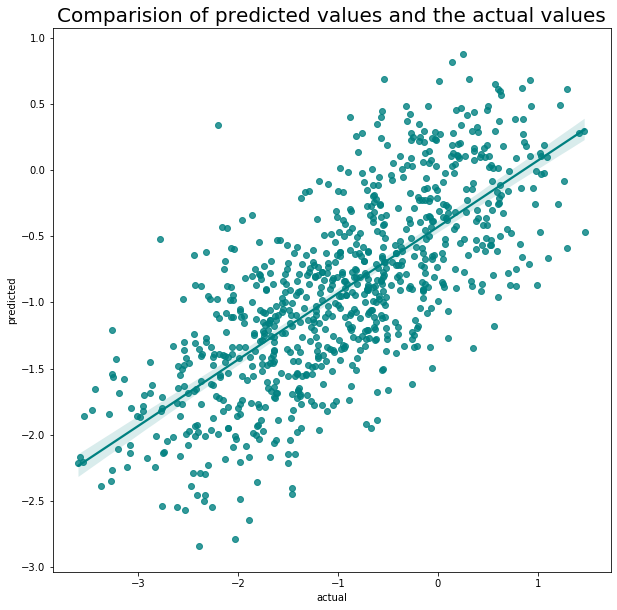

In [114]:
regression_plot_function(final_dataframe)


It is now time to predict the neural network model cross-validation data output values respectively.



In [115]:
print("The mean squared error of neural network model for cross-validation data is {}".format(mean_squared_error(y_cv_predictions, y_cv)))
print("The mean absolute error of neural network model for cross-validation data is {}".format(mean_absolute_error(y_cv_predictions, y_cv)))

The mean squared error of neural network model for cross-validation data is 0.5033201829296194
The mean absolute error of neural network model for cross-validation data is 0.5677922298978417


In [116]:
from sklearn.linear_model import LinearRegression


## 5.5 Linear Regression Machine Learning Model


Implementing the linear regression model to see how it would be able to predict the difficulty of the text respectively. When using this machine learning model, it would predict a line which are the predictions and it would try to take into account all the features that are important for the machine learning analysis.



In [124]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

We are going to be storing the cross-validation predicions of the linear regression machine learning models respectively.



In [125]:
y_cv_predictions = model.predict(X_cv)


In [126]:
from sklearn.metrics import mean_absolute_error


Since we have loaded the mean_absolute_error library, we are now going to use it to see the mean absolute erro between the cross-validation predictions and the actual predictions as can be seen below.


In [127]:
mean_absolute_error(y_cv_predictions, y_cv)


1.2910560710784365

Now is the time to print the cross validation error of the linear regression model.



In [128]:
print("The mean squared error of linear regression model for cross-validation data is {}".format(mean_squared_error(y_cv_predictions, y_cv)))
print("The mean absolute error of linear regression modle for cross-validation data is {}".format(mean_absolute_error(y_cv_predictions, y_cv)))


The mean squared error of linear regression model for cross-validation data is 2.878198460587086
The mean absolute error of linear regression modle for cross-validation data is 1.2910560710784365


It is now time to create a dataframe based on the predictions and the actual output values so that we might plot various plots to understand how different are our predictions from the actual values respectively.

In [129]:
first_dataframe = pd.DataFrame(pd.Series(y_cv), columns = ['y_actual'])
second_dataframe = pd.DataFrame(pd.Series(y_cv_predictions), columns = ['y_predictions'])

Final dataframe is created where there are predicted values and the actual values.



In [130]:
final_dataframe = pd.concat((first_dataframe, second_dataframe), axis = 1)


We are now going to see the head of the dataframe that we have just created to get a sense of the values that we are going to be plotting.



In [131]:
final_dataframe.head()


,y_actual,y_predictions
0,-2.302415,1.323329
1,-3.276238,-2.864982
2,0.164179,0.229730
3,-0.978117,-2.957959
4,-0.868544,-2.381143


## 5.6 K - Neighbors Regressor


In [132]:
from sklearn.neighbors import KNeighborsRegressor


When we are using the K Neighbors Regressor, it would be taking into account the distance between various points and there are different ways at which the distances could be calculated between the points. One of the most popular way at which the distances between a new point and the existing points are calculated is by using Euclidean Distance. There are other distances such as Hamming distance and Manhattan distance that could also be used for the calculation of the nearest neighbors. Below is the code for using the K Neighbors Regressor.

In [133]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)

Let us now print the mean absolute error and the mean squared error of the K-nearest neighbor algorithm.



In [134]:
print("The mean squared error of K Neighbors Regressor for cross-validation data is {}".format(mean_squared_error(y_predict, y_cv)))
print("The mean absolute error of K Neighbors Regressor for cross-validation data is {}".format(mean_absolute_error(y_predict, y_cv)))


The mean squared error of K Neighbors Regressor for cross-validation data is 0.7804556655225925
The mean absolute error of K Neighbors Regressor for cross-validation data is 0.7020116121739132


In [135]:
y_predict.shape

(851,)

Creaing a dataframe like we did earlier.



In [136]:
first_dataframe = pd.DataFrame(pd.Series(y_cv), columns = ['y_actual'])
second_dataframe = pd.DataFrame(pd.Series(y_predict), columns = ['y_predictions'])
final_dataframe = pd.concat((first_dataframe, second_dataframe), axis = 1)

In [137]:
final_dataframe.head()


,y_actual,y_predictions
0,-2.302415,-1.918036
1,-3.276238,-2.598757
2,0.164179,0.174785
3,-0.978117,-0.118618
4,-0.868544,-0.894470


## 5.6.1 Regression Plot between Predicted Values and the Actual Values


By observing the regression plot between the values below, we see that the predictions are not very close the actual values. If we were to get the best predictions, we should ideally get a straight dotted line without deviation. Here, the model does perform quite well but not to the point where it could be deployed in the real-world.

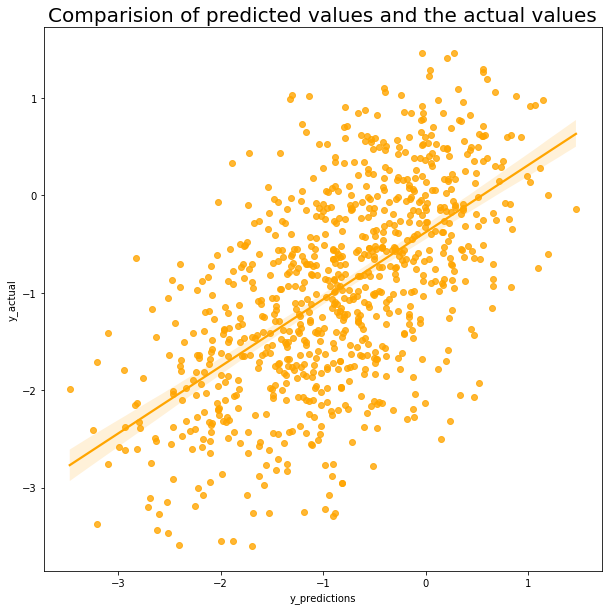

In [138]:
regression_plot_function(final_dataframe, color = 'orange')


## 5.7 PLS Regression


This is a machine learning technique which takes into account the correlation between the features present in our data. Later, it would disregard those features that are highly correlated to each other and consider only features that give are quite different from one another. This is one way of simplifying the problem of regression.

In [139]:
from sklearn.cross_decomposition import PLSRegression


In [141]:
model = PLSRegression(n_components = 20)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)


Printing the mean squared error of PLS regressor below.



In [142]:
print("The mean squared error of PLS Regressor for cross-validation data is {}".format(mean_squared_error(y_predict, y_cv)))
print("The mean absolute error of PLS Regressor for cross-validation data is {}".format(mean_absolute_error(y_predict, y_cv)))

The mean squared error of PLS Regressor for cross-validation data is 0.5575571353105683
The mean absolute error of PLS Regressor for cross-validation data is 0.5937662065854322


In [143]:
y_predict = y_predict.flatten()
y_predict.shape

(851,)

In [144]:
first_dataframe = pd.DataFrame(pd.Series(y_cv), columns = ['y_actual'])
second_dataframe = pd.DataFrame(pd.Series(y_predict), columns = ['y_predictions'])
final_dataframe = pd.concat((first_dataframe, second_dataframe), axis = 1)

In [145]:
final_dataframe.head()

,y_actual,y_predictions
0,-2.302415,-2.016915
1,-3.276238,-2.089080
2,0.164179,-0.160001
3,-0.978117,-0.838873
4,-0.868544,-0.191530


## 5.7.1 Regression plot between the Predicted Values and the Actual Values


PLS regression is performing quite well compared to that of a Logistic Regression Model. Taking a look at the plot below, one could understand that the predictions and the actual values are quite close to each other. Let us also explore other models before trying to deploy this model in real-time.

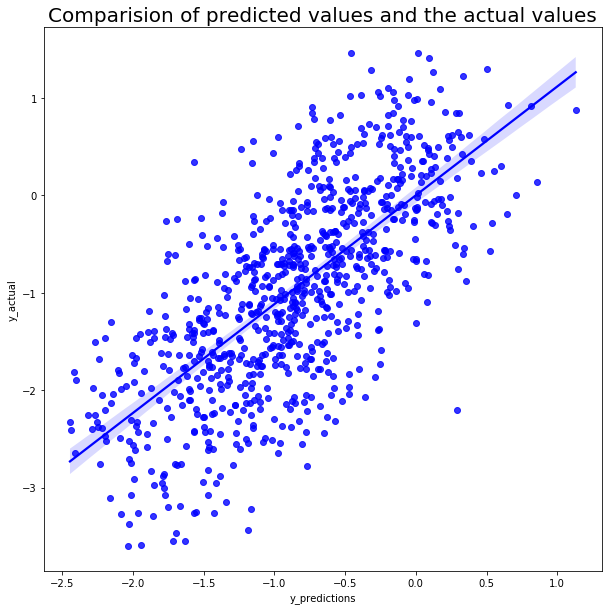

In [146]:
regression_plot_function(final_dataframe, color = 'blue')


## 5.8 Decision Tree Regressor


It is now time to use the decision tree regressor that works by dividing the data based on the entropy values respectively. The data is divided based on the information gain that is present for different the data based on different set of features. Once the model knows the features through there would be a gain of maximum information, it would divide the data based on those values. It would do it until it reaches the final node.

In [147]:
from sklearn.tree import DecisionTreeRegressor


In [148]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)

In [149]:
print("The mean squared error of Decision Tree Regressor for cross-validation data is {}".format(mean_squared_error(y_predict, y_cv)))
print("The mean absolute error of Decision Tree Regressor for cross-validation data is {}".format(mean_absolute_error(y_predict, y_cv)))

The mean squared error of Decision Tree Regressor for cross-validation data is 1.215501538030077
The mean absolute error of Decision Tree Regressor for cross-validation data is 0.889477944384254


In [150]:
y_predict.shape

(851,)

In [151]:
first_dataframe = pd.DataFrame(pd.Series(y_cv), columns = ['y_actual'])
second_dataframe = pd.DataFrame(pd.Series(y_predict), columns = ['y_predictions'])
final_dataframe = pd.concat((first_dataframe, second_dataframe), axis = 1)

In [152]:
final_dataframe.head()

,y_actual,y_predictions
0,-2.302415,-2.492539
1,-3.276238,0.227247
2,0.164179,-0.362457
3,-0.978117,-0.632471
4,-0.868544,-0.876649


## 5.8.1 Regression plot between the Predicted Values and the Actual Values


We can easily see that the decision tree regressor did not do a good job in predicted the difficulty of the text by looking at the plot generated below. There seems to be some kind of linearity but the model cannot be deployed in real-life as the error values for the cross-validation data are high respectively.

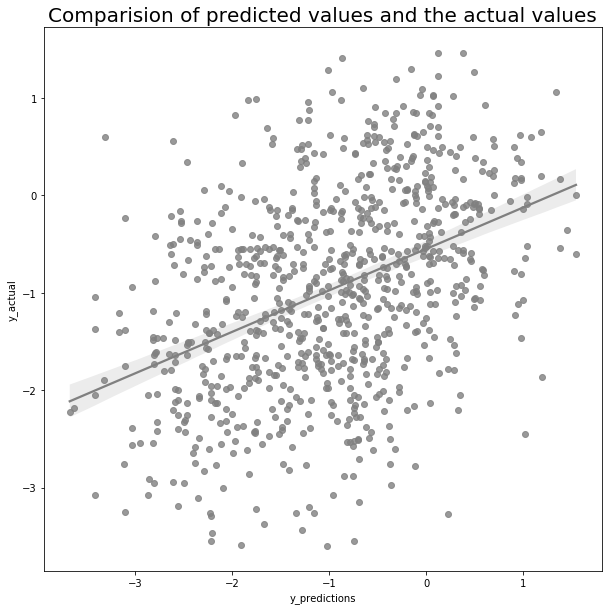

In [153]:
regression_plot_function(final_dataframe, color = 'grey')


## 5.9 Gradient Boosting Regressor


We are going to be using the gradient boosting decision tree for the prediction of the difficulty of the text respectively. We see that this machine learning model would take into account the errors between the predictions and ensures that those errors are reduced based on the iteration approach. One thing to consider is that parallelization is not possible with this model as a result of which, the present output depends on the previous output values respectively.

In [160]:
from sklearn.ensemble import GradientBoostingRegressor


We are now going to fit the model and take the predictions from the cross-validation data respectively.



In [161]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)

Let us now print the mean squared error and the mean absolute error of the predictions for the cross-validation data.



In [162]:
print("The mean squared error of Gradient Boosting Regressor for cross-validation data is {}".format(mean_squared_error(y_predict, y_cv)))
print("The mean absolute error of Gradient Boosting Regressor for cross-validation data is {}".format(mean_absolute_error(y_predict, y_cv)))

The mean squared error of Gradient Boosting Regressor for cross-validation data is 0.5691518703333184
The mean absolute error of Gradient Boosting Regressor for cross-validation data is 0.6017565897455855


Just to understand the data, we'll take the output of the predictions.



In [163]:
y_predict.shape



(851,)

Creating a dataframe that would take the predictions of the cross-validation data and store those values in a dataframe.



In [164]:
first_dataframe = pd.DataFrame(pd.Series(y_cv), columns = ['y_actual'])
second_dataframe = pd.DataFrame(pd.Series(y_predict), columns = ['y_predictions'])
final_dataframe = pd.concat((first_dataframe, second_dataframe), axis = 1)

Let us take the head of the dataframe and see how the values are stored in the dataframe that we have just created.



In [165]:
final_dataframe.head()


,y_actual,y_predictions
0,-2.302415,-2.111002
1,-3.276238,-2.546699
2,0.164179,0.204457
3,-0.978117,-0.822067
4,-0.868544,-0.616536


## 5.9.1 Regression plot between the Predicted Values and the Actual Values


Taking a look below, we see that the predictions are much more close to the actual cross-validation output values. This shows the capability of a gradient boosting decision tree where the predictions are significantly better than the other machine learning models. There is a library called 'Xgboost' that makes it really easy to use the gradient boosting decision tree and the computations performed are quite fast respectively.

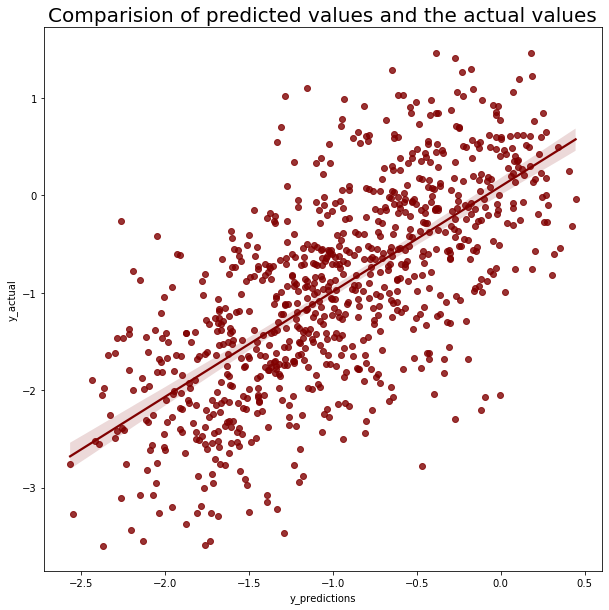

In [166]:
regression_plot_function(final_dataframe, color = 'maroon')


## 6.1 Importing Glove Vectors


So far, we used the bag of words vectorizer and the Tfidf vectorizer for our machine learning predictions. Now it is time to use the word2vec embeddings and the tfidf word2vec embeddings to make the predictions and see how those predictions would improve the performance of the machine learning models. For word2vec embeddings, we generally consider a 300 dimensional vector for every word. The values for every word are given based on the similarity between a few words that they have considered.

One important thing to note is that the semantic meaning of the words is preserved when using the word2vec and average word2vec vectorizers. On the contrary, there is a loss in the semantics when using the bag-of-words vectorizer and Tfidf vectorizer respectively. Therefore, it would be a good idea to use the word2vec for the machine learning analysis.

In [167]:
import pickle


The code below was executed before but now just commented as we have already created a pickle file contained the glove vectors which are nothing but the word2vec vectorizers. The code in the below cell could be used just for reference and it could be understood.

In [168]:
"""
## This code was taken from https://stackoverflow.com/a/38230349/4084039
## Feel free to go to the above article to understand how to retrieve glove vectors and store them in pickle files
def glove_vectors(glovefile):
    print("Loading the glove file")
    f = open(glovefile, 'r', encoding = 'utf8')
    embeddings_dictionary = {}
    for line in tqdm(f):
        values_list = line.split(' ')
        word = values_list[0]
        word_vector = np.asarray(values_list[1: ], "float32")
        embeddings_dictionary[word] = word_vector
    return embeddings_dictionary 

model = glove_vectors('glove.840B.300d.txt')

words = []
for i in preprocessed_text:
    words.extend(i.split(' '))
print("The list of all the words that are present in our data is {}".format(len(words)))
unique_words = set(words)
print("The list of unique words that are present in our data is {}".format(len(unique_words)))

intersection_words = set(model.keys()).intersection(unique_words)
print("The total number of glove words that are present in our preprocessed text is: {}".format(len(intersection_words)))
print("The percentage of glove words that are present in our preprocessed text is: {} %".format(np.round(len(intersection_words)/len(unique_words) * 100, 3)))

word_corpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        word_corpus[i] = model[i]
print("Word to vec length is {}".format(len(word_corpus)))

with open('glove_vectors', 'wb') as f:
    pickle.dump(word_corpus, f)
"""

'\n## This code was taken from https://stackoverflow.com/a/38230349/4084039\n## Feel free to go to the above article to understand how to retrieve glove vectors and store them in pickle files\ndef glove_vectors(glovefile):\n    print("Loading the glove file")\n    f = open(glovefile, \'r\', encoding = \'utf8\')\n    embeddings_dictionary = {}\n    for line in tqdm(f):\n        values_list = line.split(\' \')\n        word = values_list[0]\n        word_vector = np.asarray(values_list[1: ], "float32")\n        embeddings_dictionary[word] = word_vector\n    return embeddings_dictionary \n\nmodel = glove_vectors(\'glove.840B.300d.txt\')\n\nwords = []\nfor i in preprocessed_text:\n    words.extend(i.split(\' \'))\nprint("The list of all the words that are present in our data is {}".format(len(words)))\nunique_words = set(words)\nprint("The list of unique words that are present in our data is {}".format(len(unique_words)))\n\nintersection_words = set(model.keys()).intersection(unique_words)

Printing the total number of words that are present in our data along with the number of glove vectors. We see that there are significant number of glove words in our corpus. Therefore, we would just replace all the words in our corpus with glove vectors and discard the remaining words that are in our corpus but not in our glove vectors.



In [169]:
print("The list of all the words that are present in our data is 495400\nThe list of unique words that are present in our data is 22700\nThe total number of glove words that are present in our preprocessed text is: 21393\nThe percentage of glove words that are present in our preprocessed text is: 94.242 %\nWord2Vec length is 21393")


The list of all the words that are present in our data is 495400
The list of unique words that are present in our data is 22700
The total number of glove words that are present in our preprocessed text is: 21393
The percentage of glove words that are present in our preprocessed text is: 94.242 %
Word2Vec length is 21393


It is now time to read the pickle file that we have just created in the above commented cell. We'll store those values in glove_vectors variable.



In [170]:
def glove_vectors(glovefile):
    print("Loading the glove file")
    f = open(glovefile, 'r', encoding = 'utf8')
    embeddings_dictionary = {}
    for line in tqdm(f):
        values_list = line.split(' ')
        word = values_list[0]
        word_vector = np.asarray(values_list[1: ], "float32")
        embeddings_dictionary[word] = word_vector
    return embeddings_dictionary 

model = glove_vectors('glove.840B.300d.txt')

words = []
for i in preprocessed_text:
    words.extend(i.split(' '))
print("The list of all the words that are present in our data is {}".format(len(words)))
unique_words = set(words)
print("The list of unique words that are present in our data is {}".format(len(unique_words)))

intersection_words = set(model.keys()).intersection(unique_words)
print("The total number of glove words that are present in our preprocessed text is: {}".format(len(intersection_words)))
print("The percentage of glove words that are present in our preprocessed text is: {} %".format(np.round(len(intersection_words)/len(unique_words) * 100, 3)))

word_corpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        word_corpus[i] = model[i]
print("Word to vec length is {}".format(len(word_corpus)))

with open('glove_vectors', 'wb') as f:
    pickle.dump(word_corpus, f)

0it [00:00, ?it/s]

Loading the glove file
The list of all the words that are present in our data is 495400
The list of unique words that are present in our data is 22700
The total number of glove words that are present in our preprocessed text is: 0
The percentage of glove words that are present in our preprocessed text is: 0.0 %
Word to vec length is 0


In [171]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    glove_vectors = pickle.load(f)
    glove_words =  set(glove_vectors.keys())

We are going to be using the word2vec respesentation and convert our preprocessed text values respectively. We are going to store those values in a list and display them along with checking their length.



In [172]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_text): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += glove_vectors[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 2834/2834 [00:00<00:00, 54659.59it/s]

2834
300


We are now going to perform the same operation on the test set and see how well the model would be performing respectively.



In [173]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_text_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += glove_vectors[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 7/7 [00:00<00:00, 24610.33it/s]

7
300


We are going to stack those vectors together and make a final vector that could be used for dividing the values between the training and the test set.



In [174]:
X = np.hstack((avg_w2v_vectors, df_scaled))
X_test = np.hstack((avg_w2v_vectors_test, df_scaled_test))
y = df_train['target'].values

train_test_split would split the values based on the test_size parameter that is taken along with random_state parameter. These would determine the split of the training and the test size.



In [175]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)


## 6.2 Neural Network with Word2Vec


Using the same network architecture that we have created earlier, we are now going to train the deep neural network and evaluate the performance. We give the same set of parameters along with only altering the input shape as this shape is different from the ones that we have given earlier. Verbose is set to 0 as we do not want those values to be displayed here. Rather, we are going to plot those values in the next cells and evaluate the performance respectively.

In [176]:
model = neural_network(X_train = X_train, y_train = y_train, Validation_data = (X_cv, y_cv), input_shape = (316, ), epochs = 40, verbose = 0)


## 6.3 Defining the lineplot_neural_network function


With the aid of this function, the training and the cross-validation mean_squared error would be plotted with different epochs. We can get to know the overall performance of the machine learning or deep learning model and this also helps us know whether the model is overfitting or underfitting respectively.



In [177]:
def lineplot_neural_network(model, figsize = (10, 10)):
    y1 = model.history.history['mean_squared_error']
    y2 = model.history.history['val_mean_squared_error']
    plt.figure(figsize = figsize)
    plt.plot(y1, label = 'training error')
    plt.plot(y2, label = 'cross-validation error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Square Error')
    plt.title("Lineplot between Mean Squared Error and Epochs")
    plt.legend()
    plt.show() 

When looking at the plot below, we can say that the model is overfitting. This is because with the increase in the epochs, the training mean_square_error is decreasing while the cross-validation mean_square error is increasing. One more thing to observe is at epoch 5, there is a decrease in the training error and increase in cross-validation error respectively.



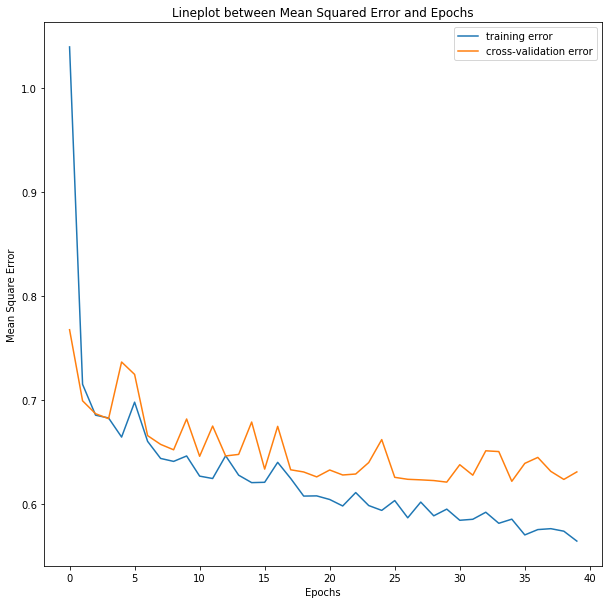

In [178]:
lineplot_neural_network(model)


## 6.4 Gradient Boosting Decision Tree for Average Word2Vec


Let us now consider the average word2vec and consider the gradient boosting decision tree to make our predictions respectively. Since it is one of the strong machine learning models with good outcomes, we are only using this machine learning model to make the predictions respectively.



In [179]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)

Printing the mean squared error of the gradient boosting regressor for the cross-validation data.



In [180]:
print("The mean squared error of Gradient Boosting Regressor for cross-validation data is {}".format(mean_squared_error(y_predict, y_cv)))
print("The mean absolute error of Gradient Boosting Regressor for cross-validation data is {}".format(mean_absolute_error(y_predict, y_cv)))

The mean squared error of Gradient Boosting Regressor for cross-validation data is 0.6467219392570052
The mean absolute error of Gradient Boosting Regressor for cross-validation data is 0.6447805267773543


## 6.5 Tfidf Word2Vec Featurization


So far, word2vec was used for the predictions using the neural network and the gradient boosting decision tree. Now, let us also use the tfidf vecorizer along with word2vec so that we get the best predictions on the overall cross-validation data respectively. In the Tfidf Vectorizer along with word2vec, the values that are taken as the final word are 300 dimensional along with tfidf product that is take as result rather than taking the average. Let us see how the performance of the machine learning model would improve overall

In [181]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_text)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

Taking into consideration the tfidf_w2v_train values, we are going to create a list of all the output values of the tfidf word2vec vectorizer.



In [182]:
tfidf_w2v_train = [];
for sentence in tqdm(preprocessed_text):
    vector = np.zeros(300)
    tf_idf_weight = 0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = glove_vectors[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec*tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train.append(vector)
print(len(tfidf_w2v_train))
print(len(tfidf_w2v_train[0]))

100%|██████████| 2834/2834 [00:00<00:00, 57041.26it/s]

2834
300


Similarly, we are going to perform the same operation on the test set respectively.



In [183]:
tfidf_w2v_train[0][0: 5]


array([0., 0., 0., 0., 0.])

In [184]:
len(tfidf_w2v_train)


2834

In [185]:
tfidf_w2v_test = [];
for sentence in tqdm(preprocessed_text_test):
    vector = np.zeros(300)
    tf_idf_weight = 0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = glove_vectors[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec*tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test.append(vector)
print(len(tfidf_w2v_test))
print(len(tfidf_w2v_test[0]))


100%|██████████| 7/7 [00:00<00:00, 34541.33it/s]

7
300


Now it is time to stack those values together and get the predictions using different machine learning models.



In [186]:
X = np.hstack((tfidf_w2v_train, df_scaled))
X_test = np.hstack((tfidf_w2v_test, df_scaled_test))
y = df_train['target'].values

## 6.6 Neural Network with Tfidf Word2Vec


Now it is time to use the tfidf word2vec vectorizer and check the values and how they would influence the outcome of the predictions. Below, we are also going to plot a graph to understand the training and the cross validation error respectively. The situation is quite similar to the one that we did with average word2vec. As the epochs increase, there is a higher chance for the neural network to overfit. Therefore, we have to ensure that the model does not overfit the data, and our model must be able to generalize on different datasets respectively.



In [187]:
model = neural_network(X_train = X_train, y_train = y_train, Validation_data = (X_cv, y_cv), input_shape = (316,), epochs = 40, verbose = 0)


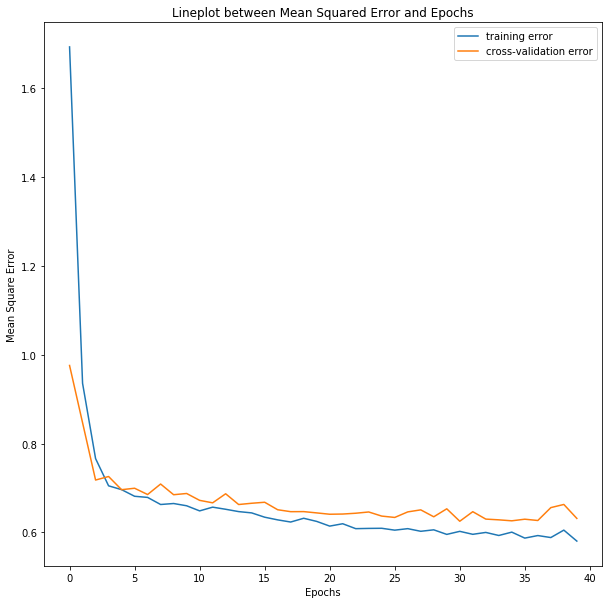

In [188]:
lineplot_neural_network(model)


We have finalized our neural network model to just 10 epochs and we see a significant increase in the performance of the machine learning model respectively. We see that validation mean square error is also decreasing with the decrease in the training error respectively. This shows us that the model is not overfitting and is performing well on the validation set respectively. We would finalize this model and take the Tfidf Word2Vec Vectorizer as features.

In [189]:
model = neural_network(X_train = X_train, y_train = y_train, Validation_data = (X_cv, y_cv), input_shape = (316,), epochs = 10, verbose = 1)


Epoch 1/10
31/31 [==============================] - 0s 5ms/step - loss: 1.5096 - mean_squared_error: 1.5096 - mean_absolute_error: 0.9789 - val_loss: 0.8341 - val_mean_squared_error: 0.8341 - val_mean_absolute_error: 0.7420
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7936 - mean_squared_error: 0.7936 - mean_absolute_error: 0.7284 - val_loss: 0.7158 - val_mean_squared_error: 0.7158 - val_mean_absolute_error: 0.6755
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7074 - mean_squared_error: 0.7074 - mean_absolute_error: 0.6752 - val_loss: 0.7057 - val_mean_squared_error: 0.7057 - val_mean_absolute_error: 0.6754
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 0.6927 - mean_squared_error: 0.6927 - mean_absolute_error: 0.6658 - val_loss: 0.7031 - val_mean_squared_error: 0.7031 - val_mean_absolute_error: 0.6724
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6609 - mean_squared_error: 0.6

In [190]:
y_predict = model.predict(X_cv)
y_predict = y_predict.flatten()

In [191]:
first_dataframe = pd.DataFrame(pd.Series(y_cv), columns = ['y_actual'])
second_dataframe = pd.DataFrame(pd.Series(y_predict), columns = ['y_predictions'])
final_dataframe = pd.concat((first_dataframe, second_dataframe), axis = 1)

Now, we are going to create a dataframe that would have predictions and the actual values as the output respectively. We are going to give this to our machine learning model for predictions for the test set respectively.



In [192]:
final_dataframe

,y_actual,y_predictions
0,-2.302415,-2.186043
1,-3.276238,-1.956701
2,0.164179,-0.036905
3,-0.978117,-0.972073
4,-0.868544,-0.924432
...,...,...
846,-1.374426,-1.228204
847,-0.866794,-2.003359
848,-2.224202,-1.657320
849,0.487495,0.044344


## 6.7 Regression plot between the Predicted Values and the Actual Values


We are taking the regression plot between the predicted values and the actual values and we are going to be plotting to check the spread of the values respectively. Taking a look at the plot below, we can easily understand that the neural network model is performing well for the data where the features are the Tfidf Word2Vec vectors along with a few vectors that we have earlier considered. This shows that in our case, the Tfidf Word2Vec Vectorization is one of the best things to do to improve the overall performance of the machine learning and deep learning models respectively.

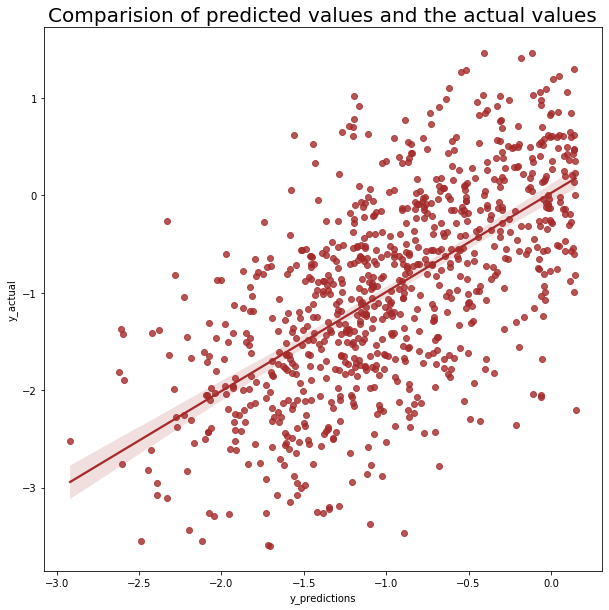

In [193]:
regression_plot_function(final_dataframe, color = 'brown')


# 7. Conclusion


All-in-all, we learned a lot during the processing of creating and implementing this project. Below are some important distinctions.

1. From the notebook, we have seen that creating new features actually improves the machine learning predictions and reduces the mean squared error (MSE) and mean absolute error (MAE) respectively.
2. One of the most distinctive steps that we have taken in the project is to use word embeddings of our text. It it known that word embeddings preserve the semantic meaning of the text along with generating new mathematical vectors. The performance of the deep learning model has improved signficantly with this approach.
3. The machine learning models that performed the best in this project is Gradient Boosting Decision Tree. Although there are other libraries such as Xgboost, we just used the Gradient Boosting Decision Tree (GBDT) for simplicity of the project.
4. We finally see that the results generated were not very far away from the actual values in the cross-validation data. Therefore, we have to perform the same set of steps that we have performed on the test set and then use the latest machine learning model to generate real-time predictions.
